In [1]:
"""
Purpose: To Analyze the borders and try to distinguish between valid from invalid split

Things to try: 
1) Decision Tree
2) PCA

"""

'\nPurpose: To Analyze the borders and try to distinguish between valid from invalid split\n\nThings to try: \n1) Decision Tree\n2) PCA\n\n'

In [100]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-07 13:41:19,830 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 13:41:19,832 - settings - Setting database.user to celiib
INFO - 2021-04-07 13:41:19,833 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 13:41:19,862 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-07 13:41:19,863 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 13:41:19,877 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-07 13:41:20,275 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 13:41:20,279 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 13:41:20,280 - settings - Setting database.user to celiib
INFO - 2021-04-07 13:41:20,281 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 13:41:20,281 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 13:41:20,282 - settings - Setting database.user to celiib
INFO - 2021-04-07 13:41:20,283 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 13:41:20,285 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 13:41:20,725 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-07 13:42:39,676 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 13:42:39,679 - settings - Setting database.user to celiib
INFO - 2021-04-07 13:42:39,680 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 13:42:39,685 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 13:42:40,186 - settings - Setting enable_python_native_blobs to True


In [184]:
minnie.AutoProofreadValidationBorder()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,axon_version,parent_idx,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,parent_no_bouton_median,parent_no_spine_median_mesh_center,child_no_bouton_median_min,child_no_bouton_median_diff_min,child_no_spine_median_mesh_center_min,child_no_spine_median_mesh_center_diff_min,child_angle_min,child_n_boutons_min,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
864691135113167769,0,0.25,30.00,5,0,0,3,0,25,124,124043806.52500916,1543.817733468448,329.3614638698137,1.9818033758876452,1.1456226962516913,2.388934917594883,0.742895,3,15,106.27459096347302,110.75343601224178,59.20002831337389,-47.074562650099125,59.20002831337389,-51.553407698867886,18.34,0,0,59.20002831337389,-47.074562650099125,59.20002831337389,-51.553407698867886,114.46,10,0,101.18,101.18,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,33,362,1158687079.9782996,3674.7854580103326,372.5871005673645,3.509178213022797,1.3529679330298574,1.963608699589879,0.5540505,0,0,182.76536725111384,182.76536725111384,92.4871982140348,-90.27816903707904,104.68539546757829,-78.07997178353556,10.95,1,0,92.4871982140348,-90.27816903707904,104.68539546757829,-78.07997178353556,38.11,15,3,48.74,48.74,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,35,51,26370949.94332186,1019.6161407995952,176.78855354532072,2.2322996232226795,1.2516471421494915,1.901370012853932,0.303688,2,17,102.08743604032234,112.09276481057641,100.48239021999521,-1.6050458203271347,102.12305340650975,-9.969711404066658,23.74,0,0,100.48239021999521,-1.6050458203271347,102.12305340650975,-9.969711404066658,126.54,1,1,149.17,149.17,invalid
864691135113167769,0,0.25,30.00,5,0,0,3,0,58,123,170487768.338267,2240.5780127218754,198.84433280695026,1.7905620799410142,1.0344524389415621,2.3329946927315195,0.660586,0,3,84.28187368323856,91.48739940492703,49.558819053315645,-34.72305462992291,53.31209769981907,-38.17530170510796,25.87,4,0,49.558819053315645,-34.72305462992291,53.31209769981907,-38.17530170510796,43.92,16,2,63.48,63.48,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,64,40,47594919.924835205,937.009081606932,251.63548827125797,1.1646130862813708,1.044847594099291,2.271011784744647,0.5999935000000001,0,1,108.18690772465524,112.71485462886615,107.87814494638877,-0.3087627782664697,116.33563389870751,3.620779269841364,38.63,2,0,107.87814494638877,-0.3087627782664697,116.33563389870751,3.620779269841364,55.95,3,0,92.78,92.78,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,65,104,218020349.15270233,2098.1580232694077,313.20655984441794,1.1392826708250756,1.047736009406659,1.9597572689690155,0.6987399999999999,0,2,107.87814494638877,116.33563389870751,52.318986773229035,-55.55915817315974,54.367293722829736,-61.96834017587778,4.34,1,0,52.318986773229035,-55.55915817315974,54.367293722829736,-61.96834017587778,29.16,6,0,32.55,32.55,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,66,200,398468976.0860605,2053.0175329991107,389.6132826512314,1.5289558965742194,1.2059730074994737,2.745894503130506,0.7163029999999999,0,0,101.32018886008184,101.32018886008184,120.84307575495245,19.52288689487061,120.84307575495245,19.52288689487061,4

# Trying Decision Tree

In [78]:
du = reload(du)

INFO - 2021-04-07 16:00:39,626 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 16:00:39,627 - settings - Setting database.user to celiib
INFO - 2021-04-07 16:00:39,628 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 16:00:39,628 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-07 16:00:39,629 - settings - Setting database.user to celiib
INFO - 2021-04-07 16:00:39,629 - settings - Setting database.password to newceliipass
INFO - 2021-04-07 16:00:39,633 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-07 16:00:40,173 - settings - Setting enable_python_native_blobs to True


In [146]:
segment_id_borders = minnie.AutoProofreadValidationBorder.fetch("segment_id")

In [147]:
np.unique(segment_id_borders,return_counts=True)

(array([864691135113167769, 864691135212632448, 864691135233108569,
        864691135272164113, 864691135348272855, 864691135382947307,
        864691135393964789, 864691135491233631, 864691135564655959,
        864691135589907979, 864691135645592260, 864691135699269154,
        864691135735426708, 864691135736387732, 864691135748575017,
        864691135771629819, 864691135785277636, 864691135865518469,
        864691135925564174, 864691135974454383, 864691135974454639,
        864691135974454895, 864691136003930314, 864691136008425132,
        864691136008573614, 864691136056340440, 864691136099807093,
        864691136105484249, 864691136105491417, 864691136105493209,
        864691136105498585, 864691136175008774, 864691136194042326,
        864691136194103510, 864691136201041854, 864691136311791677,
        864691136333776819, 864691136333790899, 864691136370815112,
        864691136537477538, 864691136545546146, 864691136550489250,
        864691136618403213, 864691136618412685])

In [148]:
n_obj = du.fetch_neuron_obj_manual(segment_id=864691135212632448,
                                  ending="soma_0_split_full_axon")

Decompressing Neuron in minimal output mode...please wait


In [185]:
n_obj.segment_id

864691135212632448

In [186]:
nviz.plot_axon(n_obj)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [150]:
import axon_utils as au
neuron_obj_web = au.calculate_axon_webbing(n_obj)

In [152]:
import neuron_visualizations as nviz
nviz.plot_boutons(neuron_obj_web,
                 plot_web=True,
                 mesh_whole_neuron_alpha=0.25)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [4]:
minnie.AutoProofreadValidationBorder()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,axon_version,parent_idx,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,parent_no_bouton_median,parent_no_spine_median_mesh_center,child_no_bouton_median_min,child_no_bouton_median_diff_min,child_no_spine_median_mesh_center_min,child_no_spine_median_mesh_center_diff_min,child_angle_min,child_n_boutons_min,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
864691135113167769,0,0.25,30.00,5,0,0,3,0,25,124,124043806.52500916,1543.817733468448,329.3614638698137,1.9818033758876452,1.1456226962516913,2.388934917594883,0.742895,3,15,106.27459096347302,110.75343601224178,59.20002831337389,-47.074562650099125,59.20002831337389,-51.553407698867886,18.34,0,0,59.20002831337389,-47.074562650099125,59.20002831337389,-51.553407698867886,114.46,10,0,101.18,101.18,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,33,362,1158687079.9782996,3674.7854580103326,372.5871005673645,3.509178213022797,1.3529679330298574,1.963608699589879,0.5540505,0,0,182.76536725111384,182.76536725111384,92.4871982140348,-90.27816903707904,104.68539546757829,-78.07997178353556,10.95,1,0,92.4871982140348,-90.27816903707904,104.68539546757829,-78.07997178353556,38.11,15,3,48.74,48.74,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,35,51,26370949.94332186,1019.6161407995952,176.78855354532072,2.2322996232226795,1.2516471421494915,1.901370012853932,0.303688,2,17,102.08743604032234,112.09276481057641,100.48239021999521,-1.6050458203271347,102.12305340650975,-9.969711404066658,23.74,0,0,100.48239021999521,-1.6050458203271347,102.12305340650975,-9.969711404066658,126.54,1,1,149.17,149.17,invalid
864691135113167769,0,0.25,30.00,5,0,0,3,0,58,123,170487768.338267,2240.5780127218754,198.84433280695026,1.7905620799410142,1.0344524389415621,2.3329946927315195,0.660586,0,3,84.28187368323856,91.48739940492703,49.558819053315645,-34.72305462992291,53.31209769981907,-38.17530170510796,25.87,4,0,49.558819053315645,-34.72305462992291,53.31209769981907,-38.17530170510796,43.92,16,2,63.48,63.48,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,64,40,47594919.924835205,937.009081606932,251.63548827125797,1.1646130862813708,1.044847594099291,2.271011784744647,0.5999935000000001,0,1,108.18690772465524,112.71485462886615,107.87814494638877,-0.3087627782664697,116.33563389870751,3.620779269841364,38.63,2,0,107.87814494638877,-0.3087627782664697,116.33563389870751,3.620779269841364,55.95,3,0,92.78,92.78,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,65,104,218020349.15270233,2098.1580232694077,313.20655984441794,1.1392826708250756,1.047736009406659,1.9597572689690155,0.6987399999999999,0,2,107.87814494638877,116.33563389870751,52.318986773229035,-55.55915817315974,54.367293722829736,-61.96834017587778,4.34,1,0,52.318986773229035,-55.55915817315974,54.367293722829736,-61.96834017587778,29.16,6,0,32.55,32.55,valid
864691135113167769,0,0.25,30.00,5,0,0,3,0,66,200,398468976.0860605,2053.0175329991107,389.6132826512314,1.5289558965742194,1.2059730074994737,2.745894503130506,0.7163029999999999,0,0,101.32018886008184,101.32018886008184,120.84307575495245,19.52288689487061,120.84307575495245,19.52288689487061,4

In [5]:
curr_table = (minnie.schema.jobs & "table_name='__auto_proofread_validation_border'")
curr_table

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__auto_proofread_validation_border,1a4070add7382f3bf6c7b067a9558dd7,error,=BLOB=,Exception: Not int or string input,=BLOB=,celiib@10.28.0.83,at-compute004,273374,297415,2021-04-07 04:08:14
__auto_proofread_validation_border,3337772d26c3563d43925ea95a0a6b47,error,=BLOB=,DataJointError: A different version of '864691135945413668_0_25_full_axon.pbz2' has already been placed.,=BLOB=,celiib@10.28.0.83,at-compute004,273689,297416,2021-04-07 03:36:06
__auto_proofread_validation_border,4f44280cb5d29418e8972fc7904347d6,error,=BLOB=,"ValueError: shape mismatch: value array of shape (3017,) could not be broadcast to indexing result of shape (3552,)",=BLOB=,celiib@10.28.0.83,at-compute004,272949,297265,2021-04-07 02:01:36
__auto_proofread_validation_border,58ef45c8ea640a701250b36d62f1851e,error,=BLOB=,DataJointError: A different version of '864691136311740477_0_25_full_axon.pbz2' has already been placed.,=BLOB=,celiib@10.28.0.83,at-compute004,274184,297419,2021-04-07 03:59:36
__auto_proofread_validation_border,59b17994c9488dba207c6908d84940be,error,=BLOB=,FileNotFoundError: [Errno 2] No such file or directory: '/neuron_mesh_tools/Auto_Proofreading/Error_Detection_Rules/Version_4/930_mesh.off',=BLOB=,celiib@10.28.0.83,at-compute004,274184,297419,2021-04-07 04:25:17
__auto_proofread_validation_border,77f69d597dc418a8928364e4523b3020,error,=BLOB=,DataJointError: A different version of '864691136333787571_0_25_soma_0_split_full_axon.pbz2' has already been placed.,=BLOB=,celiib@10.28.0.83,at-compute004,273374,297415,2021-04-07 03:58:54
__auto_proofread_validation_border,8c8676d12d77a3800468a624cee6a9df,error,=BLOB=,ValueError: attempt to get argmin of an empty sequence,=BLOB=,celiib@10.28.0.83,at-compute004,274184,297419,2021-04-07 03:22:47
__auto_proofread_validation_border,a96962ec3af2bada43d9132bf004fac5,error,=BLOB=,OSError: /neuron_mesh_tools/Auto_Proofreading/Error_Detection_Rules/Version_4/140_mesh-cgal_5_0.10_sdf.csv not found.,=BLOB=,celiib@10.28.0.83,at-compute004,274184,297419,2021-04-07 02:51:09
__auto_proofread_validation_border,ca91be663d75c97530badcbdf250ffd8,error,=BLOB=,DataJointError: A different version of '864691135407289801_0_25_full_axon.pbz2' has already been placed.,=BLOB=,celiib@10.28.0.83,at-compute004,273689,297416,2021-04-07 04:26:45
__auto_proofread_validation_border,d5d22798fcf0bda0e061d0cc4ba1ed97,error,=BLOB=,DataJointError: A different version of '864691136535575714_0_25_soma_0_split_full_axon.pbz2' has already been placed.,=BLOB=,celiib@10.28.0.83,at-compute004,273689,297416,2021-04-07 03:32:45


# Downloading the data table

In [67]:
table_data = minnie.AutoProofreadValidationBorder.fetch(as_dict=True)

In [69]:
import pandas as pd
df_raw = pd.DataFrame.from_dict(table_data)
df_raw

,segment_id,decimation_version,decimation_ratio,ver,process_version,index,split_index,proof_version,axon_version,parent_idx,...,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
0,864691135113167769,0,0.25,30.00,5,0,0,3,0,25,...,59.200028,-47.074563,59.200028,-51.553408,114.46,10,0,101.18,101.18,valid
1,864691135113167769,0,0.25,30.00,5,0,0,3,0,33,...,92.487198,-90.278169,104.685395,-78.079972,38.11,15,3,48.74,48.74,valid
2,864691135113167769,0,0.25,30.00,5,0,0,3,0,35,...,100.482390,-1.605046,102.123053,-9.969711,126.54,1,1,149.17,149.17,invalid
3,864691135113167769,0,0.25,30.00,5,0,0,3,0,58,...,49.558819,-34.723055,53.312098,-38.175302,43.92,16,2,63.48,63.48,valid
4,864691135113167769,0,0.25,30.00,5,0,0,3,0,64,...,107.878145,-0.308763,116.335634,3.620779,55.95,3,0,92.78,92.78,valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,864691136618412685,0,0.25,30.00,5,0,0,3,0,16,...,74.600071,-6.885877,87.441745,-6.968874,75.12,3,1,82.09,82.09,valid
994,864691136618412685,0,0.25,30.00,5,0,0,3,0,17,...,98.754952,-70.443255,98.754952,-70.443255,78.63,0,0,107.24,107.24,valid
995,864691136618412685,0,0.25,30.00,5,0,0,3,0,18,...,68.352290,-30.402661,68.352290,-30.402661,34.64,0,0,64.68,64.68,valid
996,864691136618412685,0,0.25,30.00,5,0,0,3,0,25,...,82.843582,8.243511,91.752010,4.310265,115.93,33,9,128.76,128.76,invalid


In [70]:
# filtering the data for only columns we care about
df_filtered = df_raw[list(df_raw.columns[10:])]
df_filtered

,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
0,124.0,1.240438e+08,1543.817733,329.361464,1.981803,1.145623,2.388935,0.742895,3,15,...,59.200028,-47.074563,59.200028,-51.553408,114.46,10,0,101.18,101.18,valid
1,362.0,1.158687e+09,3674.785458,372.587101,3.509178,1.352968,1.963609,0.554051,0,0,...,92.487198,-90.278169,104.685395,-78.079972,38.11,15,3,48.74,48.74,valid
2,51.0,2.637095e+07,1019.616141,176.788554,2.232300,1.251647,1.901370,0.303688,2,17,...,100.482390,-1.605046,102.123053,-9.969711,126.54,1,1,149.17,149.17,invalid
3,123.0,1.704878e+08,2240.578013,198.844333,1.790562,1.034452,2.332995,0.660586,0,3,...,49.558819,-34.723055,53.312098,-38.175302,43.92,16,2,63.48,63.48,valid
4,40.0,4.759492e+07,937.009082,251.635488,1.164613,1.044848,2.271012,0.599994,0,1,...,107.878145,-0.308763,116.335634,3.620779,55.95,3,0,92.78,92.78,valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,65.0,9.562469e+07,1329.129870,272.030025,1.623858,1.191796,2.343496,0.444964,1,10,...,74.600071,-6.885877,87.441745,-6.968874,75.12,3,1,82.09,82.09,valid
994,201.0,4.061000e+08,1871.314577,502.612773,2.767279,1.072094,2.316543,0.514814,0,0,...,98.754952,-70.443255,98.754952,-70.443255,78.63,0,0,107.24,107.24,valid
995,75.0,1.078374e+08,1070.813864,353.784505,1.339696,1.114212,2.438842,0.463861,0,0,...,68.352290,-30.402661,68.352290,-30.402661,34.64,0,0,64.68,64.68,valid
996,65.0,7.919536e+07,1242.486249,279.869132,1.897351,1.158778,2.536714,0.391407,1,3,...,82.843582,8.243511,91.752010,4.310265,115.93,33,9,128.76,128.76,invalid


In [42]:
# finding the nan and filtering away
import pandas_utils as pu
df_filtered_no_nan = pu.filter_away_nan_rows(df_filtered)
df_filtered_no_nan

,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
0,124.0,1.240438e+08,1543.817733,329.361464,1.981803,1.145623,2.388935,0.742895,3,15,...,59.200028,-47.074563,59.200028,-51.553408,114.46,10,0,101.18,101.18,valid
1,362.0,1.158687e+09,3674.785458,372.587101,3.509178,1.352968,1.963609,0.554051,0,0,...,92.487198,-90.278169,104.685395,-78.079972,38.11,15,3,48.74,48.74,valid
2,51.0,2.637095e+07,1019.616141,176.788554,2.232300,1.251647,1.901370,0.303688,2,17,...,100.482390,-1.605046,102.123053,-9.969711,126.54,1,1,149.17,149.17,invalid
3,123.0,1.704878e+08,2240.578013,198.844333,1.790562,1.034452,2.332995,0.660586,0,3,...,49.558819,-34.723055,53.312098,-38.175302,43.92,16,2,63.48,63.48,valid
4,40.0,4.759492e+07,937.009082,251.635488,1.164613,1.044848,2.271012,0.599994,0,1,...,107.878145,-0.308763,116.335634,3.620779,55.95,3,0,92.78,92.78,valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,65.0,9.562469e+07,1329.129870,272.030025,1.623858,1.191796,2.343496,0.444964,1,10,...,74.600071,-6.885877,87.441745,-6.968874,75.12,3,1,82.09,82.09,valid
994,201.0,4.061000e+08,1871.314577,502.612773,2.767279,1.072094,2.316543,0.514814,0,0,...,98.754952,-70.443255,98.754952,-70.443255,78.63,0,0,107.24,107.24,valid
995,75.0,1.078374e+08,1070.813864,353.784505,1.339696,1.114212,2.438842,0.463861,0,0,...,68.352290,-30.402661,68.352290,-30.402661,34.64,0,0,64.68,64.68,valid
996,65.0,7.919536e+07,1242.486249,279.869132,1.897351,1.158778,2.536714,0.391407,1,3,...,82.843582,8.243511,91.752010,4.310265,115.93,33,9,128.76,128.76,invalid


# Running a Decision Tree

clf.classes_ = ['invalid' 'valid']


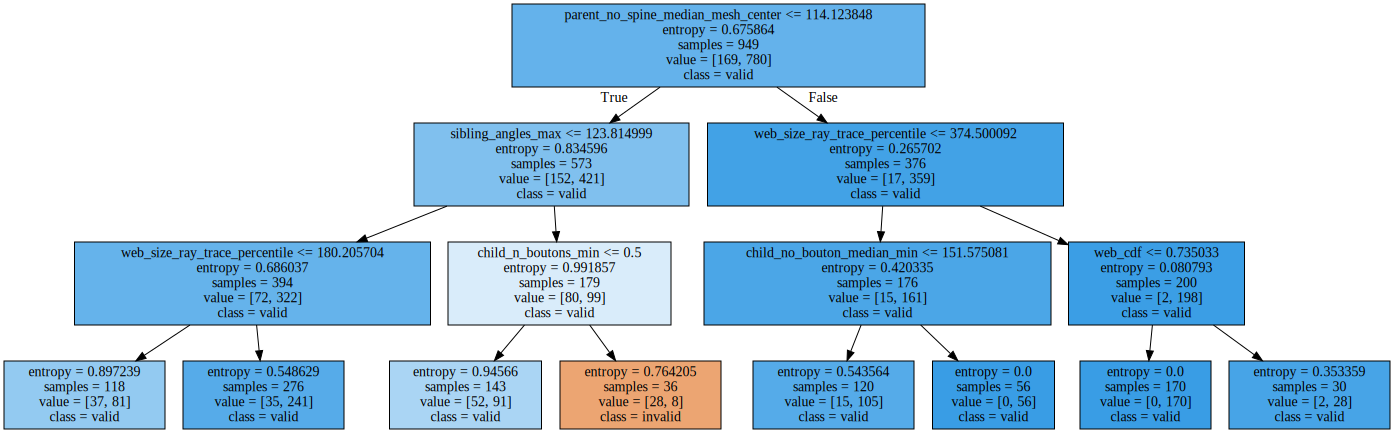

In [180]:
import machine_learning_utils as mlu

df = df_filtered_no_nan

target_column = "label"
feature_columns = list(df.columns)
feature_columns.remove(target_column)

clf = mlu.decision_tree_sklearn(df=df,
                          target_column=target_column,
                         feature_columns=None,
                          perform_testing=False,
                          test_size = 0,
                          
                          # parameters for the decision tree
                            criterion = "entropy", # entropy for infromation gain, gini fro gini index
                            splitter = "best", #For the splitt strategy,also can be "random"
                            max_depth = 3,
                            max_features = None,
                            min_samples_split= 0.1,
                            min_samples_leaf = 0.02,
                          
                         )
mlu.plot_decision_tree(clf,
                   feature_names=feature_columns,
                  )

# Running the Decision Tree just on the thin segments

In [ ]:
"parent_no_bouton_median" & "parent_n_large_boutons"

In [94]:
df_thin_parent = df_filtered_no_nan[df_filtered_no_nan["parent_no_bouton_median"] < 60]

mlu.decision_tree_analysis(df = df_thin_parent,
                          target_column = "label",
                          max_depth=3,
                          max_features=None)

,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max,label
13,236.0,7.299733e+08,3942.217861,151.109510,1.568314,1.051372,3.077084,0.581707,3,7,...,74.271995,16.226512,74.271995,7.940562,97.71,3,0,78.33,78.33,invalid
23,85.0,1.462206e+08,1718.696609,289.606413,1.503763,1.010446,2.082185,0.497012,0,0,...,89.541540,30.084870,89.541540,30.084870,95.34,0,0,105.82,105.82,valid
24,39.0,3.206770e+07,1430.059708,107.492271,3.856499,1.897541,2.163610,0.229692,0,0,...,89.640436,35.231723,89.640436,35.231723,143.95,0,0,166.94,166.94,valid
29,47.0,5.081692e+07,1394.483810,162.012027,2.001593,1.128069,2.354188,0.744082,0,3,...,62.334168,6.846846,62.334168,5.947970,109.39,0,0,122.87,122.87,valid
30,93.0,1.437029e+08,1725.623645,211.436175,2.334005,1.142662,2.470781,0.317905,0,2,...,71.079272,27.488684,42.915267,-17.834031,132.35,5,2,30.14,148.73,valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,72.0,8.619588e+07,1065.760952,280.958900,1.233758,1.018188,2.330389,0.421933,2,8,...,53.916773,0.258675,57.480041,1.447941,42.10,23,7,72.06,72.06,valid
947,47.0,3.928208e+07,759.215211,267.959074,1.122459,1.030857,2.463741,0.754364,0,1,...,53.545062,2.887207,53.812860,-14.633991,35.80,2,0,41.71,41.71,valid
954,254.0,3.071897e+08,2002.987378,356.220193,1.336335,1.121529,2.227457,0.662158,0,0,...,74.510586,18.839588,74.510586,18.839588,77.79,3,0,103.09,103.09,valid
968,54.0,3.920225e+07,928.794053,172.295155,1.665329,1.064672,2.326599,0.274987,0,2,...,89.620249,39.484998,89.620249,37.057969,124.55,1,0,142.34,142.34,invalid


clf.classes_ = ['invalid' 'valid']


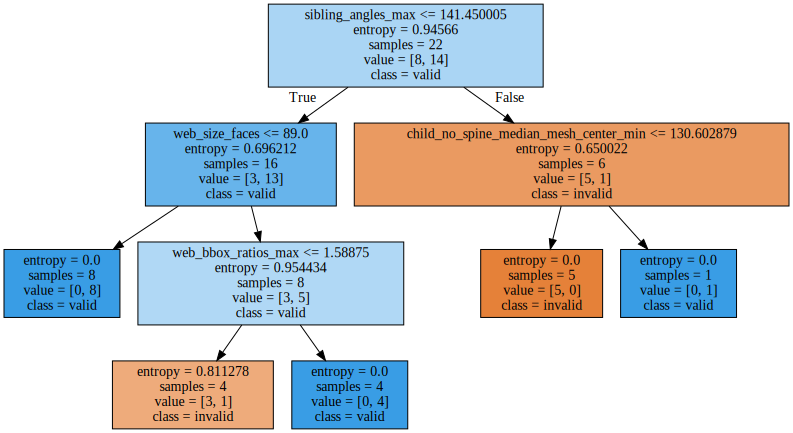

In [101]:
df_thin_parent_with_boutons = df_filtered_no_nan[(df_filtered_no_nan["parent_no_bouton_median"] < 60) & 
                                   (df_filtered_no_nan["parent_n_large_boutons"] >= 2)]

mlu.decision_tree_analysis(df = df_thin_parent_with_boutons,
                          target_column = "label",
                          max_depth=3,
                          max_features=None)

# Running Decision Tree in PCA Space

In [157]:
new_col_list = list(df_thin_parent.columns)
new_col_list.remove("label")
new_col_list

['web_size_faces',
 'web_size_volume',
 'web_size_skeleton',
 'web_size_ray_trace_percentile',
 'web_bbox_ratios_max',
 'web_bbox_ratios_min',
 'web_volume_ratio',
 'web_cdf',
 'parent_n_large_boutons',
 'parent_n_boutons',
 'parent_no_bouton_median',
 'parent_no_spine_median_mesh_center',
 'child_no_bouton_median_min',
 'child_no_bouton_median_diff_min',
 'child_no_spine_median_mesh_center_min',
 'child_no_spine_median_mesh_center_diff_min',
 'child_angle_min',
 'child_n_boutons_min',
 'child_n_large_boutons_min',
 'child_no_bouton_median_max',
 'child_no_bouton_median_diff_max',
 'child_no_spine_median_mesh_center_max',
 'child_no_spine_median_mesh_center_diff_max',
 'child_angle_max',
 'child_n_boutons_max',
 'child_n_large_boutons_max',
 'sibling_angles_min',
 'sibling_angles_max']

n_components = 28
whiten = False
---- Using sklearn method ----


<Figure size 432x288 with 0 Axes>

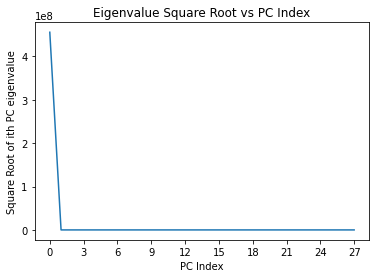

In [181]:
import dimensionality_reduction_utils as dru
pca_dict = dru.pca_analysis(df_filtered_no_nan[new_col_list].to_numpy(),
                            n_components=None,
                 whiten=False,
                           )

In [182]:
pca_proj_df = pd.DataFrame(pca_dict["data_proj"],columns=[f"PC{i}" for i in range(pca_dict["data_proj"].shape[-1])])
pca_proj_df["label"] = df_filtered_no_nan["label"]
pca_proj_df_no_nan = pu.filter_away_nan_rows(pca_proj_df)
pca_proj_df_no_nan

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,label
0,-2.542079e+08,-28.605695,56.962737,-73.750925,-50.709222,16.538959,-20.454394,18.061121,-16.447303,13.935836,...,0.183395,0.204156,-0.049173,9.889756e-12,1.745946e-14,-1.190610e-15,3.553267e-15,3.412412e-15,-3.622104e-15,valid
1,7.804354e+08,-203.449820,2.607572,-73.846032,70.358389,22.314651,90.758491,1.191537,-10.601271,-7.095431,...,-0.190360,0.096508,0.037405,-1.625402e-12,4.536019e-14,1.062887e-14,1.319139e-14,-3.825163e-15,5.544456e-15,valid
2,-3.518807e+08,-311.856902,-38.774798,18.507132,124.665082,9.867652,-85.880463,-9.198984,-14.069972,-1.473936,...,-0.119396,-0.133131,-0.007265,-2.507297e-12,1.051137e-14,9.324030e-15,3.400361e-15,1.979089e-15,7.238077e-16,invalid
3,-2.077639e+08,578.796511,45.999626,-56.020145,-1.647887,0.793460,63.003899,-8.153230,2.365874,-1.764228,...,-0.678247,0.217938,0.078711,-3.443985e-12,7.800715e-15,-7.252731e-15,-4.622142e-15,-2.888098e-15,-6.888379e-15,valid
4,-3.306568e+08,-451.675256,-50.787734,36.687780,72.383192,-28.902794,12.738505,-21.648568,9.338860,-3.197166,...,-0.313332,0.121600,-0.011288,3.572382e-12,4.527882e-14,8.494882e-15,2.436000e-15,-3.041481e-15,1.879546e-15,valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,-2.826270e+08,-168.052859,-40.660818,-22.634023,18.431164,-26.120930,18.426864,3.385068,-9.217815,2.123032,...,0.014473,-0.100877,-0.065822,4.026449e-12,3.107418e-15,4.851219e-15,6.856062e-16,-4.844457e-15,-2.230261e-15,valid
945,2.784831e+07,-356.542238,95.123918,-27.417025,-136.229701,11.100369,-12.223172,-8.500754,0.528340,-0.346136,...,0.096624,-0.030819,0.233894,-2.379521e-11,-7.262028e-15,6.504680e-15,7.892850e-15,1.493220e-15,5.135760e-15,valid
946,-2.704142e+08,-462.425452,-10.477380,-71.273955,-17.258412,-31.861935,59.568546,-12.593884,4.904525,-4.346457,...,0.100818,-0.080533,-0.040079,2.057395e-12,1.007251e-14,4.774542e-15,8.136279e-15,-4.676004e-17,2.799699e-15,valid
947,-2.990563e+08,-217.729380,-68.684756,-10.509669,11.812570,-11.542367,-58.034293,-2.551571,-7.423457,5.191524,...,-0.406145,-0.123580,0.018599,-5.507864e-12,-6.499982e-15,1.859952e-15,-2.700000e-15,-9.171744e-16,-4.119799e-15,valid


clf.classes_ = ['invalid' 'valid']


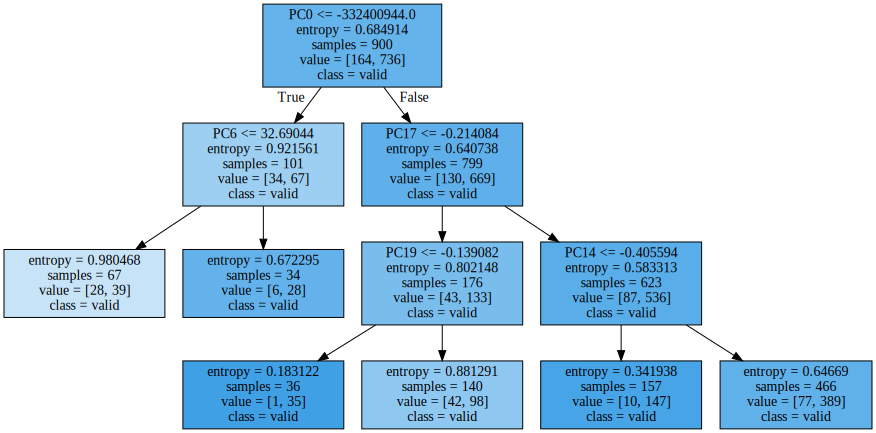

In [183]:
mlu.decision_tree_analysis(df = pca_proj_df_no_nan,
                          target_column = "label",
                          max_depth=3,
                          max_features=None)

# Running a Classifier with PCA

In [130]:
import dimensionality_reduction_utils as dr
import clustering_utils as cl
import pandas_utils as pu

from sklearn.preprocessing import StandardScaler
import time
from collections import Counter
import copy
np.set_printoptions(suppress=True)
from sklearn import mixture
import gmm

In [104]:
df_pca = df_filtered_no_nan

In [136]:
pu.delete_columns?

In [105]:
for j,c in enumerate(df_pca.columns[6:]):
    print(f"{j+1}) {c}")

1) web_volume_ratio
2) web_cdf
3) parent_n_large_boutons
4) parent_n_boutons
5) parent_no_bouton_median
6) parent_no_spine_median_mesh_center
7) child_no_bouton_median_min
8) child_no_bouton_median_diff_min
9) child_no_spine_median_mesh_center_min
10) child_no_spine_median_mesh_center_diff_min
11) child_angle_min
12) child_n_boutons_min
13) child_n_large_boutons_min
14) child_no_bouton_median_max
15) child_no_bouton_median_diff_max
16) child_no_spine_median_mesh_center_max
17) child_no_spine_median_mesh_center_diff_max
18) child_angle_max
19) child_n_boutons_max
20) child_n_large_boutons_max
21) sibling_angles_min
22) sibling_angles_max
23) label


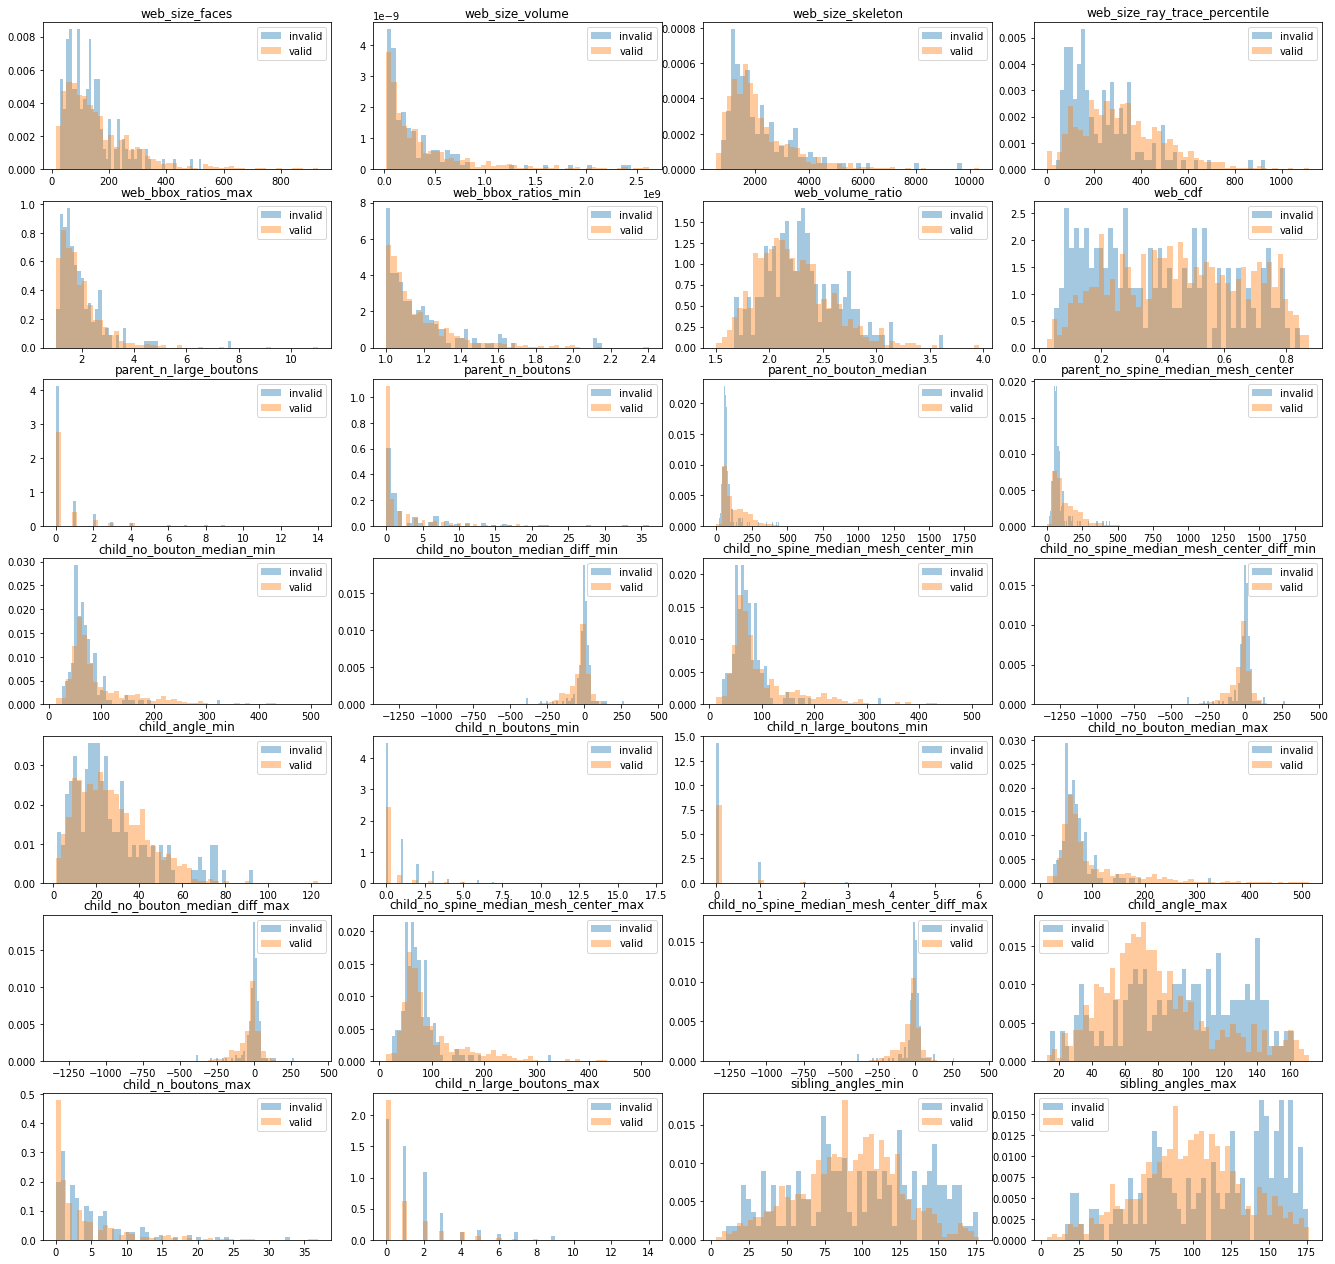

In [127]:
import statistics_visualizations as sviz
    
sviz.plot_table_histograms(df_pca,
                     category_column="label")

# -------- Part 0: Preprocessing (Column restriction, Normalization, PCA) ----------- #
Applying Normalization
# -------- Part 1: GMM clustering with different Number of Clusters ----------- # 


------Working on clusters K=2-----
Using mixture model
reversing the normalizing transformation
Convergence status = True
Total time for GMM = 0.05370497703552246


------Working on clusters K=3-----
Using mixture model
reversing the normalizing transformation
Convergence status = True
Total time for GMM = 0.0976099967956543


------Working on clusters K=4-----
Using mixture model
reversing the normalizing transformation
Convergence status = True
Total time for GMM = 0.24441266059875488


------Working on clusters K=5-----
Using mixture model
reversing the normalizing transformation
Convergence status = True
Total time for GMM = 0.6084790229797363


------Working on clusters K=6-----
Using mixture model
reversing the normalizing transformation
Convergence status = True
Total time for GMM = 0.2

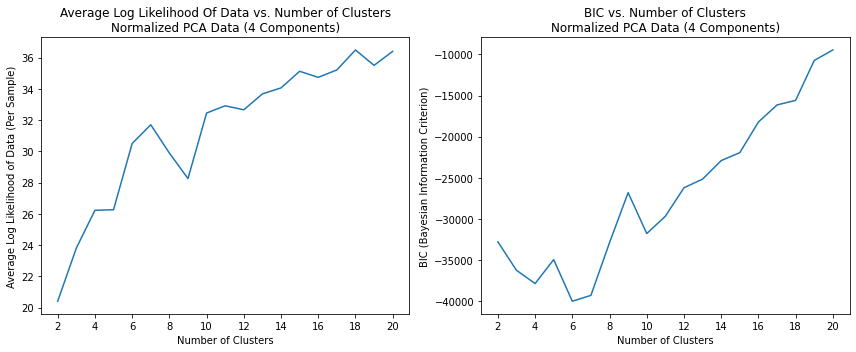

# --------- Part 2: computing the advanced statistics on the clustering ------- # 


----Working on Advanced Statistics for n_clusters = 2----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,122.755675,2.437885e+08,1889.506301,267.572269,1.874603,1.154043,2.318421,0.481614,9.461692e-01,4.501032e+00,...,1.677018e-01,68.535872,-3.727819,72.657922,-5.643593,81.958568,5.71843,1.449278,89.033408,99.632933
1,195.819807,5.176204e+08,2391.878797,346.306029,2.046667,1.199711,2.153514,0.411990,3.330669e-16,-4.440892e-16,...,1.387779e-17,125.375706,-53.585342,126.883970,-52.077077,82.412879,1.99141,0.442056,95.324584,102.781275




Clustering Numbers By Neuroscience Category for K = 2


,classification,category,n_clusters,cl_0,cl_1
0,hard,invalid,2,117,52
1,hard,valid,2,366,414




Clustering Advanced Statistics By Neuroscience Category for K = 2


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,2,0,0.692308,2,0.202037
1,valid,hard,2,1,0.530769,2,0.827108




----Working on Advanced Statistics for n_clusters = 3----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,122.340845,2.414934e+08,1847.531588,272.882792,1.874214,1.157409,2.313610,0.501262,8.270575e-01,4.038519e+00,...,2.910694e-01,63.959146,-10.609776,71.114123,-8.438377,78.472760,7.244162,1.916003,87.271599,97.546484
1,197.089177,5.230165e+08,2408.989550,347.229329,2.053509,1.200869,2.150751,0.411727,-2.220446e-16,-2.220446e-15,...,-1.387779e-17,125.688559,-55.394032,127.205385,-53.877205,82.133461,1.861310,0.380883,95.540469,102.848144
2,123.330383,2.455359e+08,1926.584527,261.617955,1.866895,1.148876,2.324422,0.453848,1.066163e+00,4.935680e+00,...,-9.714451e-17,75.999020,7.280008,76.036878,0.129590,87.136379,3.861888,0.932392,91.111094,102.337062




Clustering Numbers By Neuroscience Category for K = 3


,classification,category,n_clusters,cl_0,cl_1,cl_2
0,hard,invalid,3,81,47,41
1,hard,valid,3,196,410,174




Clustering Advanced Statistics By Neuroscience Category for K = 3


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,3,0,0.479290,3,0.215019
1,valid,hard,3,1,0.525641,3,0.829921




----Working on Advanced Statistics for n_clusters = 4----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,122.498795,2.389850e+08,1904.197887,263.506097,1.854473,1.141799,2.320221,0.456241,9.310328e-01,4.502282e+00,...,-2.775558e-17,75.699212,6.037633,75.721223,-0.654918,81.471400,3.460501,0.893360,94.440548,94.440548
1,141.513293,3.093911e+08,1904.317001,302.187355,1.876074,1.125591,2.332022,0.527474,8.851614e-01,3.811932e+00,...,1.156190e+00,66.251824,-21.173080,74.123890,-18.256600,69.805100,10.455183,3.084800,83.636730,89.510030
2,198.745222,5.307878e+08,2423.400377,349.786082,2.056431,1.201903,2.145006,0.412752,3.330669e-16,-4.440892e-16,...,2.775558e-17,127.010195,-56.380489,128.525960,-54.864724,81.995857,1.697307,0.335179,95.701342,103.151552
3,117.953180,2.259820e+08,1856.009407,260.542660,1.884553,1.170618,2.316023,0.480729,9.025688e-01,4.352029e+00,...,1.387779e-17,65.280973,-4.775108,71.156730,-4.284080,86.527632,6.293710,1.513831,86.368616,105.887573




Clustering Numbers By Neuroscience Category for K = 4


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3
0,hard,invalid,4,32,25,45,67
1,hard,valid,4,152,45,403,180




Clustering Advanced Statistics By Neuroscience Category for K = 4


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,4,3,0.396450,3,0.220047
1,valid,hard,4,2,0.516667,3,0.831010




----Working on Advanced Statistics for n_clusters = 5----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,133.296013,2.749667e+08,1845.009656,302.402314,1.850576,1.117882,2.337880,0.549874,1.096641e+00,4.626307,...,1.139284e+00,64.683563,-11.825281,72.425462,-9.615607,67.578894,10.888085,3.120574,84.216602,90.554007
1,195.569769,5.045624e+08,2363.971285,346.866623,2.017824,1.204896,2.141135,0.415376,2.775558e-16,0.048010,...,6.938894e-17,138.805810,-41.198650,138.817578,-41.211151,77.923977,0.752955,0.115924,97.425622,97.425622
2,280.414595,9.948788e+08,3651.558068,317.356725,2.782133,1.286317,2.262345,0.336771,1.515150e-01,0.662152,...,-5.551115e-17,96.351570,-101.413933,99.637989,-98.487688,99.597178,2.147108,0.521509,72.247497,120.392989
3,123.695953,2.445677e+08,1923.029089,265.882412,1.888789,1.159644,2.319065,0.479431,1.137553e+00,5.449143,...,1.387779e-17,70.428158,1.030286,73.491645,-3.546521,86.485095,4.605511,1.110398,89.558560,103.158202
4,126.266307,2.399843e+08,1751.367939,302.418222,1.769325,1.143517,2.219049,0.439588,-4.440892e-16,0.100394,...,-5.551115e-17,76.624202,-43.591273,82.411850,-37.824044,83.020982,6.281345,1.530596,96.146121,103.297778




Clustering Numbers By Neuroscience Category for K = 5


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4
0,hard,invalid,5,26,34,8,63,38
1,hard,valid,5,45,298,44,263,130




Clustering Advanced Statistics By Neuroscience Category for K = 5


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,5,3,0.372781,4,0.207124
1,valid,hard,5,1,0.382051,3,0.828210




----Working on Advanced Statistics for n_clusters = 6----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,157.523022,4.827593e+08,2687.191671,222.926342,2.113587,1.207229,2.399296,0.396052,1.577754e+00,6.534748e+00,...,2.775558e-17,71.328499,6.315882,74.911720,2.720296,120.089862,5.240890,1.278033e+00,76.204349,141.064882
1,135.634317,2.841050e+08,1819.401701,319.028734,1.868163,1.128123,2.292665,0.546526,1.042028e+00,4.464246e+00,...,1.188748e+00,65.369127,-13.320885,73.664536,-10.378033,72.778965,10.298559,3.291005e+00,84.128004,94.228298
2,174.287019,4.329212e+08,2224.088699,332.390497,1.970069,1.180535,2.175368,0.412056,0.000000e+00,1.332268e-15,...,2.775558e-17,106.104772,-54.428939,108.917748,-51.615963,84.650447,3.866789,8.604461e-01,94.361934,108.282113
3,216.174107,5.951772e+08,2546.250951,363.809752,2.092327,1.215516,2.127414,0.411741,1.110223e-16,2.220446e-15,...,4.163336e-17,146.342635,-55.127515,146.342635,-55.127515,79.642589,0.000000,4.440892e-16,96.811339,96.811339
4,124.513132,2.374537e+08,1910.909089,262.375794,1.887758,1.133455,2.349515,0.459691,7.564883e-01,3.600762e+00,...,-2.775558e-17,77.735116,7.909844,77.757411,1.800136,81.091872,2.194951,5.289374e-01,93.072049,95.352443
5,110.014641,1.766219e+08,1677.950531,266.484336,1.833125,1.165963,2.280307,0.502142,8.371115e-01,4.451316e+00,...,2.775558e-17,62.482103,-9.910995,68.386205,-9.770694,73.935246,6.787760,1.527815e+00,91.443320,91.447132




Clustering Numbers By Neuroscience Category for K = 6


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5
0,hard,invalid,6,19,29,38,15,24,44
1,hard,valid,6,46,39,203,209,121,162




Clustering Advanced Statistics By Neuroscience Category for K = 6


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,6,5,0.260355,5,0.226557
1,valid,hard,6,3,0.267949,4,0.832421




----Working on Advanced Statistics for n_clusters = 7----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,219.899148,6.125673e+08,2560.268717,371.130416,2.098722,1.218414,2.117252,0.414585,0.000000e+00,0.000000,...,-2.775558e-17,149.208856,-63.875954,149.208856,-63.875954,78.531293,1.332268e-15,-1.110223e-16,97.114209,97.114209
1,120.987114,2.245299e+08,1847.005781,270.091405,1.790868,1.117093,2.327410,0.466834,8.458611e-01,3.976776,...,6.938894e-17,80.716903,11.914256,80.732214,5.863482,81.301140,2.521598e+00,7.013208e-01,93.562732,95.253429
2,133.953274,2.819381e+08,1841.260636,299.750552,1.873719,1.130533,2.329757,0.547085,7.258939e-01,3.774657,...,1.306604e+00,65.753051,-12.742448,74.188974,-9.654653,67.142667,1.040302e+01,3.161425e+00,86.292039,89.734734
3,111.776211,2.364506e+08,1657.771368,313.514620,1.610488,1.105335,2.348067,0.522104,3.938621e-01,2.808213,...,-5.551115e-17,65.136484,-13.324964,68.900653,-16.083234,110.623411,8.447788e+00,1.983080e+00,77.386827,131.675379
4,112.176352,1.769202e+08,1708.128616,259.860483,1.847707,1.168863,2.287231,0.494115,7.941615e-01,4.262446,...,2.775558e-17,62.502656,-10.209673,68.450057,-10.210020,72.828736,6.035688e+00,1.280687e+00,90.685802,90.685802
5,173.757380,4.274162e+08,2239.073570,325.829501,2.008385,1.184969,2.184032,0.410165,-2.775558e-16,0.000000,...,2.775558e-17,103.804042,-46.607651,106.557864,-43.853829,85.254577,3.720017e+00,8.430812e-01,94.266329,108.177167
6,176.546442,5.912620e+08,3108.982419,205.386077,2.464237,1.279573,2.371641,0.342345,2.585896e+00,9.170655,...,-5.551115e-17,67.552453,0.573615,72.108665,-1.027684,120.019354,5.890376e+00,1.652321e+00,79.444660,134.600135




Clustering Numbers By Neuroscience Category for K = 7


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6
0,hard,invalid,7,13,24,24,15,40,38,15
1,hard,valid,7,206,124,38,25,152,204,31




Clustering Advanced Statistics By Neuroscience Category for K = 7


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,7,4,0.236686,5,0.229411
1,valid,hard,7,0,0.264103,4,0.833039




----Working on Advanced Statistics for n_clusters = 8----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,171.367160,4.234416e+08,2141.131596,340.435992,1.877263,1.145654,2.188667,0.407332,-2.220446e-16,-8.881784e-16,...,1.387779e-17,88.509831,-79.866883,93.235688,-75.141027,91.368891,4.938813,1.175842,92.008636,114.956470
1,400.066667,1.763523e+09,6259.797056,262.110877,4.296042,1.564089,2.174039,0.322204,5.333333e-01,2.133333e+00,...,0.000000e+00,94.945282,-48.553704,100.275108,-45.480741,95.940667,5.200000,1.333333,92.436667,116.437333
2,199.252686,5.182473e+08,2396.860964,350.285683,2.048062,1.210839,2.140769,0.414935,6.106227e-16,3.552714e-15,...,1.249001e-16,141.343915,-43.035985,141.358206,-43.021695,78.160406,0.686007,0.120253,97.028346,97.028346
3,141.895290,2.860685e+08,1687.285364,378.911777,1.765009,1.110927,2.267351,0.547716,7.951435e-01,3.525694e+00,...,1.387779e-17,116.393592,43.654662,117.794617,39.595550,103.140471,3.228390,0.768761,101.654389,124.847814
4,132.875747,2.762706e+08,1817.875471,313.638425,1.823642,1.121909,2.296969,0.553148,6.818285e-01,3.545607e+00,...,1.212182e+00,65.019487,-12.093669,73.320549,-8.819774,75.100098,10.696549,3.318144,83.196136,94.635836
5,135.741221,3.169667e+08,2390.379042,164.851299,2.290984,1.253748,2.433788,0.329087,6.400023e-01,5.025093e+00,...,-5.551115e-17,62.773762,-3.262808,66.099886,-9.504397,127.144698,3.940343,1.028373,82.995244,143.493434
6,110.611137,1.880557e+08,1742.877962,260.441397,1.798399,1.147620,2.310360,0.489129,7.099880e-01,3.442208e+00,...,-1.387779e-17,63.537347,-7.114960,67.290852,-8.920479,72.516049,5.051377,1.184660,89.739001,89.739001
7,136.079280,3.084177e+08,2041.225543,269.611279,1.833190,1.122122,2.332599,0.454180,4.751866e+00,1.846360e+01,...,3.576312e-02,79.093853,8.555950,81.964816,2.694765,93.641171,6.887855,1.285728,85.704320,109.226559




Clustering Numbers By Neuroscience Category for K = 8


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7
0,hard,invalid,8,23,2,30,11,26,17,53,7
1,hard,valid,8,115,13,290,26,40,28,247,21




Clustering Advanced Statistics By Neuroscience Category for K = 8


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,8,6,0.313609,5,0.224620
1,valid,hard,8,2,0.371795,3,0.832001




----Working on Advanced Statistics for n_clusters = 9----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,128.987775,2.773336e+08,2110.558451,199.618361,1.933878,1.185887,2.359196,0.352482,9.325360e-01,4.876053e+00,...,2.775558e-17,65.258726,-0.975674,70.404179,-2.533233,118.107119,4.188066e+00,1.095479e+00,94.399615,134.037776
1,109.915254,1.929790e+08,1674.040922,275.973087,1.846893,1.162344,2.300025,0.547054,2.502295e-01,1.886888e+00,...,1.617935e-01,62.354250,-11.553062,68.688669,-9.411793,61.202875,6.228490e+00,1.460276e+00,82.038982,82.038982
2,449.347251,1.477343e+09,5482.021168,254.008967,4.650326,1.507071,2.160555,0.274419,4.210855e-01,1.684342e+00,...,2.775558e-17,90.877424,-72.758920,94.204442,-71.213775,100.812675,2.842327e+00,7.895353e-01,102.887757,115.750867
3,118.101601,2.135687e+08,1812.581329,265.630623,1.809733,1.134600,2.326525,0.460960,9.290080e-01,4.253555e+00,...,-4.163336e-17,75.990397,6.860372,76.003588,0.338352,80.479436,3.371314e+00,8.963181e-01,93.277870,93.277870
4,143.950021,2.572836e+08,1798.039407,323.807142,1.731198,1.151946,2.344849,0.564190,9.000001e-01,3.950001e+00,...,2.000001e+00,70.814545,-15.156924,79.290451,-13.098089,64.381513,1.645000e+01,5.050000e+00,79.832517,87.444522
5,188.168244,4.965297e+08,2338.557349,350.538541,1.965443,1.191843,2.149294,0.417011,3.885781e-16,0.000000e+00,...,2.775558e-17,126.411443,-52.986403,127.922130,-51.475717,81.451635,1.803665e+00,3.576457e-01,95.580012,102.830586
6,138.198747,3.011943e+08,1886.218945,359.979570,1.989276,1.092009,2.254531,0.593370,4.680880e-01,2.654245e+00,...,4.056574e-01,70.268756,-7.077250,78.502513,-2.603179,99.650314,1.184533e+01,3.094893e+00,93.190011,123.608362
7,644.000000,2.618279e+09,3778.829576,1037.166134,2.166614,1.249307,1.779831,0.507306,1.054712e-15,5.329071e-15,...,1.942890e-16,513.682102,-1337.693006,513.682102,-1337.693006,67.120000,8.437695e-15,2.109424e-15,31.670000,31.670000
8,122.864960,2.188683e+08,1734.268521,302.793208,1.780934,1.136874,2.301109,0.488802,3.942806e+00,1.549995e+01,...,1.467518e-01,73.725890,2.512045,78.857175,-0.874802,77.703983,8.502160e+00,2.116101e+00,80.108765,95.372690




Clustering Numbers By Neuroscience Category for K = 9


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8
0,hard,invalid,9,31,30,4,28,5,45,14,0,12
1,hard,valid,9,59,112,15,147,15,391,18,1,22




Clustering Advanced Statistics By Neuroscience Category for K = 9


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,9,5,0.266272,5,0.228359
1,valid,hard,9,5,0.501282,3,0.832811




----Working on Advanced Statistics for n_clusters = 10----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,362.142857,1.569258e+09,6227.441731,209.269954,4.744622,1.642316,2.267434,0.286746,5.714286e-01,2.285714e+00,...,1.387779e-17,95.437545,-23.119728,100.662921,-20.312420,98.461429,4.428571e+00,1.285714e+00,95.787143,113.242857
1,148.099887,3.835203e+08,2449.765145,201.087876,2.248824,1.234724,2.465419,0.356460,5.571274e-01,3.300867e+00,...,-8.326673e-17,70.545725,5.578409,74.882482,2.052377,123.816280,4.513553e+00,1.396260e+00,72.731574,146.606889
2,136.736289,2.851276e+08,1917.793131,294.619092,1.822249,1.116916,2.357428,0.480119,5.318564e+00,2.036596e+01,...,4.546801e-02,80.259871,10.799052,83.911431,6.019306,93.211526,6.092668e+00,1.318559e+00,87.975494,109.262410
3,113.825419,1.762688e+08,1671.442258,267.997239,1.814231,1.163585,2.281612,0.499841,7.495143e-01,3.955602e+00,...,2.775558e-17,62.710011,-10.090069,68.500024,-9.509473,73.593734,6.568663e+00,1.426353e+00,90.816990,90.820992
4,224.125075,6.944449e+08,2888.725168,301.528692,2.314647,1.213910,2.276270,0.367165,-1.665335e-16,4.440892e-16,...,1.387779e-17,81.058402,-87.972870,84.335079,-84.696192,99.379064,3.478718e+00,8.002047e-01,70.855364,120.636731
5,113.049092,2.239694e+08,1864.445107,264.111128,1.798157,1.122671,2.329999,0.469647,7.579709e-01,3.523865e+00,...,5.551115e-17,78.047479,9.099688,78.056716,2.582191,83.953764,2.619888e+00,7.159884e-01,93.071825,100.542189
6,644.000000,2.618279e+09,3778.829576,1037.166134,2.166614,1.249307,1.779831,0.507306,1.054712e-15,5.329071e-15,...,1.942890e-16,513.682102,-1337.693006,513.682102,-1337.693006,67.120000,8.437695e-15,2.109424e-15,31.670000,31.670000
7,142.766693,2.840004e+08,1756.797000,355.634000,1.650539,1.123276,2.137839,0.439044,-1.110223e-16,0.000000e+00,...,-4.163336e-17,94.506963,-53.462447,98.510784,-49.458626,81.130638,5.173489e+00,1.300507e+00,104.188263,105.516650
8,205.773639,5.428473e+08,2450.649086,354.718271,2.061376,1.213016,2.128284,0.412979,-1.110223e-16,1.332268e-15,...,-1.387779e-17,144.801061,-47.031600,144.808991,-47.023669,78.527389,3.872942e-01,0.000000e+00,96.720556,96.720556
9,132.189818,2.748378e+08,1812.362619,311.725937,1.819913,1.122211,2.312392,0.549522,6.615606e-01,3.461725e+00,...,1.230800e+00,65.136705,-10.503167,73.628612,-7.041764,73.331701,1.072285e+01,3.276953e+00,85.322067,95.861210




Clustering Numbers By Neuroscience Category for K = 10


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9
0,hard,invalid,10,3,15,7,41,9,28,0,17,22,27
1,hard,valid,10,11,28,15,158,46,125,1,96,262,38




Clustering Advanced Statistics By Neuroscience Category for K = 10


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,10,3,0.242604,6,0.228544
1,valid,hard,10,8,0.335897,4,0.832851




----Working on Advanced Statistics for n_clusters = 11----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,166.766726,4.142704e+08,2188.765488,276.534267,1.983794,1.176987,2.295616,0.342233,0.000000e+00,0.000000e+00,...,-2.775558e-17,93.544689,-53.650262,96.476788,-50.718162,116.682174,4.122855e+00,8.765699e-01,78.249106,132.761941
1,98.940769,2.001037e+08,1828.875534,230.559532,1.920604,1.198124,2.292043,0.460649,3.801001e-01,2.093852e+00,...,9.520250e-03,61.937666,-12.035382,68.712393,-9.292502,65.039890,4.960005e+00,1.052030e+00,82.517618,82.517618
2,120.119527,2.246268e+08,1859.977436,265.551391,1.814554,1.138947,2.317416,0.458171,1.099625e+00,4.964975e+00,...,-8.326673e-17,77.039160,7.909875,77.056223,0.785421,84.833337,2.653822e+00,6.284150e-01,93.971695,99.291109
3,158.525416,4.160393e+08,2668.117708,161.742211,2.433322,1.250111,2.561407,0.268198,6.128744e-01,3.774702e+00,...,6.453593e-02,61.219723,-3.484516,66.258039,-5.728769,129.725022,6.387127e+00,1.709866e+00,70.642271,146.461384
4,128.238492,2.245321e+08,1716.221168,313.459085,1.802359,1.129165,2.297904,0.567475,5.635510e-01,3.236396e+00,...,1.363357e+00,66.430267,-11.585532,75.129685,-8.108714,66.030442,1.054385e+01,3.126736e+00,85.997859,88.765292
5,644.000000,2.618279e+09,3778.829576,1037.166134,2.166614,1.249307,1.779831,0.507306,1.054712e-15,5.329071e-15,...,1.942890e-16,513.682102,-1337.693006,513.682102,-1337.693006,67.120000,8.437695e-15,2.109424e-15,31.670000,31.670000
6,116.166567,2.157567e+08,1779.680579,282.501238,1.757523,1.123284,2.318481,0.462595,3.937866e+00,1.599842e+01,...,9.088756e-02,65.638561,-7.302499,72.032581,-10.224066,81.846853,8.270735e+00,1.848486e+00,87.755499,98.183784
7,128.904755,2.000429e+08,1514.628371,331.726565,1.669154,1.094478,2.276430,0.615488,4.357298e-01,2.817032e+00,...,-6.938894e-17,63.873136,-5.458414,69.197309,-4.945594,89.860931,9.162735e+00,2.507543e+00,95.509834,113.938759
8,375.294121,1.538232e+09,5902.985774,231.149585,4.681683,1.501053,2.175120,0.281347,4.705883e-01,1.882353e+00,...,2.775558e-17,95.251372,-61.811145,100.025236,-59.028630,90.502943,3.882353e+00,9.411765e-01,88.902941,110.080001
9,215.520586,5.873651e+08,2511.311528,365.022970,2.090396,1.215294,2.127371,0.412897,-4.996004e-16,-4.440892e-16,...,-4.163336e-17,146.804520,-55.317001,146.804520,-55.317001,79.547453,-1.332268e-15,-6.661338e-16,96.488339,96.488339




Clustering Numbers By Neuroscience Category for K = 11


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10
0,hard,invalid,11,12,23,30,10,20,0,10,23,2,15,24
1,hard,valid,11,44,82,148,21,35,1,23,53,15,208,150




Clustering Advanced Statistics By Neuroscience Category for K = 11


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,11,2,0.177515,7,0.223134
1,valid,hard,11,9,0.266667,5,0.831679




----Working on Advanced Statistics for n_clusters = 12----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,113.872559,1.936383e+08,1568.635637,324.473325,1.820775,1.108573,2.271887,0.588108,4.423756e-01,3.574559e+00,...,6.735644e-01,63.681626,-7.565972,71.407833,-4.819170,72.697122,1.017424e+01,2.713113e+00,87.980393,97.723724
1,110.259744,2.011205e+08,1733.931523,259.381331,1.785337,1.158524,2.309139,0.506331,3.587505e-01,1.824132e+00,...,7.445393e-03,61.881569,-10.489284,68.503456,-7.828235,68.667820,5.349338e+00,1.257150e+00,87.053638,87.053638
2,205.764204,5.427671e+08,2450.529041,354.702214,2.061372,1.212998,2.128309,0.412965,-1.665335e-16,0.000000e+00,...,0.000000e+00,144.791244,-47.036866,144.799174,-47.028936,78.527414,3.868517e-01,-1.110223e-16,96.719677,96.719677
3,291.250000,1.225472e+09,5598.903448,179.834055,4.856236,1.724476,2.318396,0.275642,6.875000e-01,2.625000e+00,...,2.775558e-17,85.368200,-14.845117,88.862714,-13.752088,107.969375,3.875000e+00,1.250000e+00,104.989375,128.259375
4,148.562699,3.149652e+08,2088.521330,247.628390,2.400898,1.130686,2.406543,0.203662,5.551115e-17,0.000000e+00,...,2.775558e-17,86.518446,-172.260792,90.907776,-167.871462,80.924467,3.000232e+00,4.375508e-01,70.407480,105.497186
5,214.538013,6.645033e+08,2654.777174,337.494891,2.031406,1.189303,2.191825,0.420479,1.110223e-16,-4.440892e-16,...,1.387779e-17,104.228838,-44.872126,107.605067,-41.495898,101.686724,4.241014e+00,9.712802e-01,82.406438,118.846804
6,134.145802,2.407989e+08,1703.052901,329.702906,1.665753,1.132977,2.176756,0.455275,2.775558e-16,2.221900e-01,...,0.000000e+00,78.937883,-43.676623,82.905758,-39.796257,80.561876,4.778904e+00,1.219266e+00,106.363056,106.393790
7,644.000000,2.618279e+09,3778.829576,1037.166134,2.166614,1.249307,1.779831,0.507306,1.054712e-15,5.329071e-15,...,1.942890e-16,513.682102,-1337.693006,513.682102,-1337.693006,67.120000,8.437695e-15,2.109424e-15,31.670000,31.670000
8,161.912129,4.287561e+08,2622.827393,187.169325,2.198659,1.195444,2.450772,0.359491,6.661309e-01,3.964307e+00,...,9.996032e-02,65.262552,0.111026,71.940167,1.018174,127.664771,6.001692e+00,1.567354e+00,80.674101,143.778211
9,122.782455,2.366129e+08,1900.065184,268.326926,1.844781,1.138078,2.329323,0.462384,1.164500e+00,5.092715e+00,...,-1.249001e-16,76.696822,7.151494,76.719330,-0.659477,86.374563,3.457005e+00,8.626874e-01,89.119891,101.614976




Clustering Numbers By Neuroscience Category for K = 12


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11
0,hard,invalid,12,19,29,22,5,3,10,23,0,13,29,11,5
1,hard,valid,12,33,104,262,11,13,60,89,1,17,152,24,14




Clustering Advanced Statistics By Neuroscience Category for K = 12


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,12,9,0.171598,7,0.226623
1,valid,hard,12,2,0.335897,5,0.832435




----Working on Advanced Statistics for n_clusters = 13----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,213.616326,5.816931e+08,2494.617633,365.003006,2.076960,1.213109,2.123604,0.410810,2.775558e-16,4.440892e-16,...,5.551115e-17,147.618651,-54.241700,147.618651,-54.241700,80.012482,1.776357e-15,4.440892e-16,96.554917,96.737936
1,118.531207,1.920127e+08,1618.563592,297.799023,1.697604,1.135443,2.203215,0.475470,1.665335e-16,3.009046e-01,...,2.775558e-17,64.012164,-35.310893,70.632794,-28.852447,74.719474,5.787468e+00,1.275768e+00,98.339258,98.403181
2,130.894590,2.260309e+08,1699.822799,296.028699,1.767608,1.147093,2.404881,0.540504,1.087459e+00,4.870539e+00,...,1.869810e+00,67.402471,-14.422672,74.786233,-13.142073,66.567330,1.434772e+01,4.305432e+00,83.177180,89.799434
3,121.839990,2.302294e+08,1868.665987,264.951038,1.820752,1.134210,2.338418,0.460475,1.105933e+00,4.968358e+00,...,5.551115e-17,79.891658,10.028806,79.913673,2.195559,87.567156,3.312388e+00,8.226843e-01,89.777730,102.797084
4,152.274747,3.499213e+08,2033.157445,333.296055,1.869088,1.183980,2.170043,0.434851,-1.110223e-16,-1.332268e-15,...,-2.775558e-17,122.710251,-23.037224,122.926121,-22.821354,73.126505,3.634349e+00,8.051685e-01,97.900561,97.900561
5,171.127656,4.776802e+08,3209.827569,136.350767,4.129166,1.616699,2.321989,0.242265,3.512590e-01,3.154360e+00,...,0.000000e+00,70.632663,-4.999950,74.561654,-3.096938,126.488868,4.906657e+00,1.555549e+00,120.047660,142.149005
6,155.027845,3.458686e+08,1944.988798,362.298738,1.760407,1.083025,2.226409,0.518882,2.561794e+00,8.333533e+00,...,2.180835e-01,61.227027,-16.768877,71.563414,-11.584282,100.735138,1.482103e+01,4.488460e+00,75.636341,113.765489
7,145.165815,4.501185e+08,2847.895609,165.898202,2.217717,1.237887,2.426384,0.287024,5.808382e-01,3.032938e+00,...,1.614890e-01,60.928605,-12.957557,67.223944,-12.404110,56.208982,6.293796e+00,1.549082e+00,67.142023,67.142023
8,429.375000,1.737485e+09,5935.623662,325.257164,3.047432,1.346442,2.000073,0.354382,3.750000e-01,1.562500e+00,...,1.387779e-17,79.453025,-97.639955,85.048166,-92.946686,81.708125,2.437500e+00,3.750000e-01,90.941875,104.978125
9,140.673516,3.336721e+08,2266.539469,212.608559,1.918975,1.141800,2.344225,0.407559,1.090835e+00,6.333344e+00,...,3.030549e-02,71.014946,2.376625,78.884274,3.343396,124.599915,3.969610e+00,9.696134e-01,89.848548,142.590474




Clustering Numbers By Neuroscience Category for K = 13


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12
0,hard,invalid,13,15,25,6,29,18,6,9,10,2,16,12,21,0
1,hard,valid,13,213,85,17,152,105,14,14,21,14,17,41,86,1




Clustering Advanced Statistics By Neuroscience Category for K = 13


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,13,3,0.171598,7,0.230225
1,valid,hard,13,0,0.273077,5,0.833215




----Working on Advanced Statistics for n_clusters = 14----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,120.129301,2.277910e+08,1875.642727,265.110457,1.841305,1.135938,2.331729,0.467405,1.291673e+00,5.395748e+00,...,1.387779e-17,78.544277,8.311196,78.553487,0.372149,85.054738,3.107183e+00,6.989535e-01,90.957642,98.528117
1,153.075187,3.535443e+08,2049.413697,324.237837,1.882316,1.191801,2.183803,0.434620,3.330669e-16,2.220446e-15,...,6.938894e-17,130.541843,-8.911781,130.560780,-8.892844,71.891957,3.882694e+00,8.776191e-01,97.979244,97.979244
2,145.401878,2.641973e+08,1808.012342,305.089867,1.856199,1.123291,2.340888,0.512956,6.430834e-01,3.679572e+00,...,1.426902e-01,59.915118,-8.991126,64.671100,-8.218307,96.909916,1.907387e+01,5.286114e+00,86.195024,116.170944
3,93.800893,1.475245e+08,1642.563871,241.295035,1.958742,1.183114,2.265683,0.500102,2.951477e-01,1.800563e+00,...,2.194676e-01,62.993622,-15.022743,70.194941,-11.973348,56.942676,5.833912e+00,1.421288e+00,75.790946,75.790946
4,644.000000,2.618279e+09,3778.829576,1037.166134,2.166614,1.249307,1.779831,0.507306,1.054712e-15,5.329071e-15,...,1.942890e-16,513.682102,-1337.693006,513.682102,-1337.693006,67.120000,8.437695e-15,2.109424e-15,31.670000,31.670000
5,215.528499,5.873983e+08,2511.395122,365.025444,2.090428,1.215300,2.127373,0.412887,-4.440892e-16,-1.776357e-15,...,-8.326673e-17,146.806590,-55.320994,146.806590,-55.320994,79.548539,-2.664535e-15,-8.881784e-16,96.487791,96.487791
6,404.500000,1.642645e+09,6166.236160,244.281553,4.367712,1.533146,2.140089,0.285059,5.000000e-01,2.000000e+00,...,1.387779e-17,88.541265,-55.614115,93.537977,-52.733212,99.743125,4.125000e+00,1.000000e+00,95.676875,118.177500
7,172.035505,4.496169e+08,2294.052328,274.050132,2.084159,1.161843,2.259610,0.327759,1.665335e-16,4.440892e-16,...,5.551115e-17,91.700440,-69.092284,95.406612,-65.386111,106.974768,4.508603e+00,8.801451e-01,76.874217,123.022022
8,123.683004,2.570958e+08,2161.184968,187.937653,2.383547,1.264064,2.292753,0.344185,8.572072e-01,5.071752e+00,...,7.143593e-02,65.810900,2.651156,72.556074,4.574140,128.068032,3.999626e+00,1.321303e+00,134.578109,151.509500
9,139.218732,2.497401e+08,1711.958141,329.103000,1.691308,1.125944,2.321350,0.560928,7.873320e-01,4.252492e+00,...,1.715768e+00,68.613490,-9.709382,78.320502,-5.802556,74.390437,1.324660e+01,3.854877e+00,92.012612,97.461154




Clustering Numbers By Neuroscience Category for K = 14


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13
0,hard,invalid,14,19,17,10,24,0,15,2,14,18,9,5,7,12,17
1,hard,valid,14,138,88,18,81,1,208,14,52,10,19,37,23,13,78




Clustering Advanced Statistics By Neuroscience Category for K = 14


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,14,3,0.142012,8,0.259364
1,valid,hard,14,5,0.266667,6,0.839529




----Working on Advanced Statistics for n_clusters = 15----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,156.433194,3.543388e+08,2013.889283,346.293831,1.781689,1.152589,2.154134,0.441481,3.885781e-16,2.220446e-15,...,4.163336e-17,106.490125,-44.525244,109.384674,-41.630695,74.016582,4.029327e+00,8.525218e-01,101.074576,101.074576
1,287.285711,7.149091e+08,4031.676524,185.773020,5.951660,1.855299,2.197856,0.294720,7.142857e-02,5.000000e-01,...,1.387779e-17,159.679863,-25.579260,159.970467,-26.600244,84.662857,1.857143e+00,2.857143e-01,86.252857,94.451429
2,139.951046,5.205380e+08,3300.096565,121.636194,2.408529,1.319473,2.521807,0.235857,7.499761e-01,2.449953e+00,...,5.000061e-02,63.817793,-4.653435,68.172790,-5.421629,57.541949,5.350014e+00,1.300013e+00,64.267925,64.267925
3,148.772954,3.988634e+08,2809.723640,143.335124,2.655261,1.293844,2.540374,0.252105,7.272721e-01,4.772720e+00,...,9.090933e-02,68.816087,6.084076,74.704985,5.733074,131.476398,4.681828e+00,1.136367e+00,85.299475,147.122818
4,500.890358,1.994431e+09,6513.649265,335.882368,3.334283,1.420450,2.066805,0.366752,5.334044e-01,1.933591e+00,...,1.387779e-17,70.232837,-90.941625,76.035593,-86.407423,100.050754,3.400453e+00,1.066809e+00,106.454720,125.022528
5,155.125000,2.488796e+08,1733.105809,357.693381,1.808088,1.156269,2.205868,0.512915,1.125000e+00,3.250000e+00,...,3.250000e+00,69.949242,-17.493308,81.006081,-12.179499,68.228750,2.225000e+01,6.625000e+00,87.308750,100.277500
6,104.020256,1.452112e+08,1501.760195,277.463485,1.734397,1.148492,2.270839,0.533689,5.497077e-01,3.023199e+00,...,-1.387779e-17,62.474674,-10.831321,67.627488,-11.361223,71.106989,5.954725e+00,1.433052e+00,90.841776,90.841776
7,117.448537,2.052345e+08,1652.001632,298.597324,1.813993,1.123206,2.334449,0.565047,6.735542e-01,3.796396e+00,...,1.040947e+00,64.983250,-10.991752,73.096037,-8.280882,64.917251,8.305658e+00,2.489857e+00,85.249657,86.239373
8,145.904819,3.362940e+08,1979.324410,325.234280,1.796457,1.124553,2.256702,0.501481,4.761905e-01,3.095240e+00,...,4.761909e-02,61.795975,-11.428415,66.763883,-9.459173,107.294286,1.990476e+01,5.666666e+00,79.038068,120.738549
9,644.000000,2.618279e+09,3778.829576,1037.166134,2.166614,1.249307,1.779831,0.507306,1.054712e-15,5.329071e-15,...,1.942890e-16,513.682102,-1337.693006,513.682102,-1337.693006,67.120000,8.437695e-15,2.109424e-15,31.670000,31.670000




Clustering Numbers By Neuroscience Category for K = 15


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14
0,hard,invalid,15,21,2,6,10,2,1,30,19,8,0,14,7,13,13,23
1,hard,valid,15,142,12,14,12,13,7,148,30,13,1,203,24,42,25,94




Clustering Advanced Statistics By Neuroscience Category for K = 15


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,15,6,0.177515,8,0.235058
1,valid,hard,15,10,0.260256,5,0.834263




----Working on Advanced Statistics for n_clusters = 16----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,189.953030,7.247380e+08,3540.294956,133.947335,2.047653,1.147989,2.734825,0.275271,6.822678e-01,2.909035e+00,...,9.096908e-02,59.442140,-7.027033,62.813457,-8.607419,116.098539,4.910346e+00,1.272907e+00,54.950703,127.790761
1,104.889258,1.634597e+08,1657.057028,260.311615,1.794733,1.160734,2.281058,0.494120,4.996025e-01,2.056585e+00,...,0.000000e+00,63.552765,-10.451776,69.461130,-8.364671,69.439859,6.370980e+00,1.575105e+00,88.057676,88.057676
2,213.625996,5.817405e+08,2494.733094,365.006622,2.077004,1.213117,2.123603,0.410799,5.551115e-17,0.000000e+00,...,1.387779e-17,147.622786,-54.246361,147.622786,-54.246361,80.014380,1.776357e-15,2.220446e-16,96.554503,96.737545
3,644.000000,2.618279e+09,3778.829576,1037.166134,2.166614,1.249307,1.779831,0.507306,1.054712e-15,5.329071e-15,...,1.942890e-16,513.682102,-1337.693006,513.682102,-1337.693006,67.120000,8.437695e-15,2.109424e-15,31.670000,31.670000
4,162.538606,3.474614e+08,1946.717781,357.396447,1.668093,1.134282,2.159374,0.467503,1.665335e-16,2.943246e-01,...,1.387779e-17,70.764535,-64.144630,76.866216,-58.127247,85.230781,3.253883e+00,7.305377e-01,109.129910,109.502852
5,122.798285,2.426971e+08,1958.277224,251.770644,1.838011,1.133155,2.348930,0.443354,1.052784e+00,4.482237e+00,...,-4.163336e-17,83.556391,14.534938,83.564468,7.447149,86.524138,1.767976e+00,4.106350e-01,92.347931,101.507067
6,128.477899,2.250687e+08,1670.397649,319.627188,1.795181,1.122000,2.313440,0.577758,4.288881e-01,2.960632e+00,...,1.082432e+00,67.089019,-12.030700,75.519958,-8.445265,66.572091,8.945382e+00,2.430366e+00,86.828200,89.937435
7,108.043380,2.080832e+08,1690.480802,251.241369,1.691587,1.124917,2.367145,0.431590,6.651058e-01,5.085130e+00,...,-5.551115e-17,64.065777,-4.679119,69.717813,-8.685710,118.494095,3.941273e+00,8.456475e-01,94.150919,143.115148
8,155.705209,3.461412e+08,2033.344451,323.651251,1.906936,1.190921,2.170273,0.432360,-1.665335e-16,-1.332268e-15,...,-4.163336e-17,128.019139,-14.916563,128.064130,-14.871572,72.924524,3.791123e+00,8.411636e-01,97.749389,97.749389
9,412.266667,1.799038e+09,6197.763107,310.267050,3.146718,1.357430,2.037828,0.354833,4.000000e-01,1.866667e+00,...,1.387779e-17,73.846711,-92.812953,78.610046,-90.000094,80.371333,2.866667e+00,4.000000e-01,87.165333,102.137333




Clustering Numbers By Neuroscience Category for K = 16


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15
0,hard,invalid,16,11,26,15,0,16,23,19,16,17,2,4,5,0,0,9,6
1,hard,valid,16,11,104,213,1,64,114,30,23,97,13,22,14,5,33,13,23




Clustering Advanced Statistics By Neuroscience Category for K = 16


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,16,1,0.153846,8,0.250507
1,valid,hard,16,2,0.273077,6,0.837610




----Working on Advanced Statistics for n_clusters = 17----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,146.117647,2.344774e+08,1588.971769,344.793682,1.793693,1.171021,2.258409,0.578659,8.235294e-01,3.588235e+00,...,2.176471e+00,71.224657,-18.738356,79.783910,-16.294201,67.291765,1.682353e+01,4.882353e+00,82.011176,90.966471
1,155.852190,3.639362e+08,2167.607217,261.451625,1.995215,1.174493,2.355086,0.345695,4.440892e-16,3.108624e-15,...,8.326673e-17,86.476823,-42.255540,88.992082,-39.740281,117.035648,3.902274e+00,1.008148e+00,79.523316,130.793814
2,113.276519,1.803539e+08,1953.072089,183.406281,2.315199,1.266110,2.099741,0.352890,8.182410e-01,6.000233e+00,...,1.818314e-01,68.415896,0.623187,73.877280,0.607033,134.381827,3.000047e+00,1.045451e+00,138.776996,147.346255
3,97.680270,1.268359e+08,1424.948198,287.662968,1.748787,1.136755,2.230362,0.565582,2.702490e-01,1.909625e+00,...,1.803735e-01,62.729513,-12.531532,69.500159,-10.008282,61.586435,5.107543e+00,1.205308e+00,80.592362,80.592362
4,118.514479,2.086029e+08,1799.255169,271.544766,1.781374,1.130045,2.323006,0.470657,9.549423e-01,4.296532e+00,...,2.775558e-17,77.654127,8.248672,77.667987,1.391574,82.706509,2.798562e+00,6.467749e-01,93.500802,97.329231
5,485.681895,1.890044e+09,5382.706825,422.770115,2.639356,1.327431,1.939656,0.452360,1.176803e-01,4.118811e-01,...,4.163336e-17,70.419324,-137.016934,77.533544,-130.206867,87.971748,2.293724e+00,4.118811e-01,87.211968,107.861920
6,137.460675,2.665966e+08,1830.326670,293.298734,1.741612,1.121412,2.342651,0.503724,8.716023e-01,4.583365e+00,...,2.259160e-01,59.653257,-9.588745,64.542033,-9.344162,94.672020,1.825887e+01,4.903897e+00,87.771236,110.775601
7,644.000000,2.618279e+09,3778.829576,1037.166134,2.166614,1.249307,1.779831,0.507306,1.054712e-15,5.329071e-15,...,1.942890e-16,513.682102,-1337.693006,513.682102,-1337.693006,67.120000,8.437695e-15,2.109424e-15,31.670000,31.670000
8,154.714281,5.817940e+08,3281.398041,138.380414,1.608085,1.090008,2.852031,0.303693,1.428572e+00,5.761905e+00,...,1.904762e-01,62.937220,2.786115,66.876676,1.462935,60.805715,7.380953e+00,2.000000e+00,72.571901,76.951902
9,297.333333,1.219023e+09,2770.183354,545.439257,1.783736,1.198074,2.043762,0.408995,1.110223e-16,4.440892e-16,...,2.775558e-17,400.573259,231.460493,400.573259,231.460493,76.495000,1.332268e-15,4.440892e-16,72.155000,72.155000




Clustering Numbers By Neuroscience Category for K = 17


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15,cl_16
0,hard,invalid,17,4,15,15,23,26,3,11,0,7,1,7,0,18,6,3,14,16
1,hard,valid,17,13,44,7,99,139,14,20,1,14,5,22,10,111,19,14,22,226




Clustering Advanced Statistics By Neuroscience Category for K = 17


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,17,4,0.153846,8,0.254560
1,valid,hard,17,16,0.289744,6,0.838488




----Working on Advanced Statistics for n_clusters = 18----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,208.083090,5.725966e+08,2456.937065,365.620884,2.048752,1.208543,2.127714,0.414931,0.000000e+00,-4.440892e-16,...,2.775558e-17,148.481362,-54.236139,148.481362,-54.236139,79.084737,4.440892e-16,2.220446e-16,96.048193,96.048193
1,191.835157,4.822501e+08,2427.505284,363.463012,1.909774,1.200335,2.161224,0.471738,2.775558e-16,1.776357e-15,...,4.163336e-17,135.617849,-11.864283,135.633844,-11.848287,68.023402,3.774132e+00,6.890905e-01,95.783353,95.783353
2,113.163730,1.789915e+08,1779.546446,258.786286,1.892060,1.139341,2.343503,0.434148,8.595674e-01,3.868177e+00,...,9.553555e-02,60.986681,-11.466380,65.999639,-10.477958,84.152553,2.313133e+01,5.581946e+00,82.340378,103.261230
3,472.268538,1.557676e+09,4677.277978,470.811475,2.659885,1.255641,1.900276,0.441280,1.665335e-16,1.332268e-15,...,2.775558e-17,67.424369,-171.742932,73.136148,-166.031154,85.270402,2.297698e+00,3.534926e-01,83.511079,101.854399
4,90.750000,1.519817e+08,1655.540417,199.235766,1.519349,1.080633,2.606988,0.387565,5.625000e-01,2.312500e+00,...,6.250000e-02,54.548408,-15.955361,57.313048,-21.104202,96.798125,3.000000e+00,1.000000e+00,113.281250,143.298125
5,644.000000,2.618279e+09,3778.829576,1037.166134,2.166614,1.249307,1.779831,0.507306,1.054712e-15,5.329071e-15,...,1.942890e-16,513.682102,-1337.693006,513.682102,-1337.693006,67.120000,8.437695e-15,2.109424e-15,31.670000,31.670000
6,113.999438,1.779356e+08,1553.608928,287.420328,1.839249,1.130954,2.335283,0.573931,4.872189e-01,3.359247e+00,...,1.077010e+00,65.917098,-13.859895,73.617726,-11.262616,60.810866,9.281830e+00,2.435933e+00,80.547845,81.791278
7,119.451807,2.451344e+08,1902.071846,283.439500,1.895537,1.116344,2.249604,0.477995,4.169673e+00,1.827494e+01,...,6.677645e-02,71.672132,-2.835302,76.851117,-6.997988,92.997763,7.524245e+00,1.531513e+00,90.692395,104.859849
8,178.723198,2.947124e+08,1727.077941,394.364807,1.484673,1.098440,2.160872,0.658241,5.384202e-01,4.730689e+00,...,-1.387779e-17,66.692201,-3.452162,70.682449,-7.554259,100.879289,4.576903e+00,1.038442e+00,95.622808,123.588439
9,141.000000,2.495841e+08,1738.999047,382.533884,1.587080,1.149992,2.104690,0.543432,1.333333e+00,3.500000e+00,...,3.833333e+00,69.105725,-8.814785,80.144246,-3.290707,73.995000,2.183333e+01,7.666667e+00,84.921667,102.213333




Clustering Numbers By Neuroscience Category for K = 18


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,...,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15,cl_16,cl_17
0,hard,invalid,18,14,9,7,2,8,0,11,...,7,1,22,12,9,24,11,7,4,13
1,hard,valid,18,205,65,14,15,8,1,28,...,19,5,99,14,11,136,12,35,11,80




Clustering Advanced Statistics By Neuroscience Category for K = 18


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,18,13,0.142012,11,0.250564
1,valid,hard,18,0,0.262821,7,0.837622




----Working on Advanced Statistics for n_clusters = 19----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,146.437482,2.494642e+08,1720.354900,344.642437,1.703864,1.125481,2.379598,0.648652,4.418228e-01,4.907965e+00,...,2.406034e-01,64.895074,-5.023176,70.726507,-4.951373,87.695311,7.070232e+00,1.794422e+00,96.400180,114.266955
1,201.149675,5.627844e+08,2651.145019,284.909260,2.003427,1.165642,2.310437,0.385630,3.885781e-16,1.776357e-15,...,6.938894e-17,121.660038,-5.355407,121.660045,-5.355400,102.999851,3.019997e+00,5.007517e-01,85.565744,118.404148
2,118.898655,2.075598e+08,1697.738861,304.832063,1.886212,1.167953,2.182908,0.420100,-4.440892e-16,-1.332268e-15,...,-5.551115e-17,120.432267,-16.391799,120.459073,-16.364992,72.584521,3.585400e+00,8.218064e-01,98.614447,98.614447
3,189.601863,7.172610e+08,3594.302928,138.811601,2.028154,1.135147,2.702741,0.274633,8.688915e-01,3.563764e+00,...,1.305126e-01,58.305711,-5.298941,61.590969,-7.741791,108.194480,4.869488e+00,1.216926e+00,60.934912,122.017263
4,95.364653,1.282809e+08,1498.526155,269.248765,1.903094,1.159652,2.261104,0.542187,1.722839e-01,1.540908e+00,...,2.160258e-01,61.456233,-12.006859,68.418685,-8.672873,52.988168,5.595745e+00,1.197992e+00,69.326966,69.326966
5,134.175927,2.580118e+08,1863.123083,284.737495,1.743289,1.117458,2.349537,0.444470,4.065255e-01,2.531613e+00,...,3.127117e-02,61.595685,-23.571057,66.896611,-21.497713,88.115112,2.062406e+01,5.280761e+00,83.165621,104.418123
6,141.692351,2.701003e+08,1785.265574,332.779611,1.697451,1.139463,2.278521,0.571011,9.232551e-01,4.616124e+00,...,1.807853e+00,69.298618,-17.340307,80.383840,-12.130315,73.101985,1.365489e+01,4.038455e+00,90.675105,96.531834
7,191.772848,4.952276e+08,2495.488900,212.959203,1.907196,1.135839,2.387612,0.159572,5.551115e-17,0.000000e+00,...,1.387779e-17,79.226954,-224.650534,83.969065,-219.908423,82.817159,3.146122e+00,5.005195e-01,58.872100,103.750819
8,194.137449,4.601119e+08,2219.933845,406.061184,1.707914,1.139012,2.092173,0.481031,3.330669e-16,1.776357e-15,...,4.163336e-17,73.102823,-86.482115,79.700188,-79.884750,84.256493,3.232363e+00,8.266363e-01,110.189108,111.009539
9,581.666667,1.665842e+09,3734.322589,776.467796,1.869373,1.229026,1.691737,0.576383,1.110223e-16,1.332268e-15,...,2.775558e-17,107.044517,-258.354667,109.433373,-255.965812,95.745000,3.333333e-01,1.666667e-01,90.840000,102.398333




Clustering Numbers By Neuroscience Category for K = 19


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,...,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15,cl_16,cl_17,cl_18
0,hard,invalid,19,6,10,14,12,19,7,9,...,1,7,1,0,2,12,24,27,0,8
1,hard,valid,19,19,42,75,11,74,25,17,...,5,14,21,1,13,194,34,136,6,25




Clustering Advanced Statistics By Neuroscience Category for K = 19


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,19,16,0.159763,10,0.248011
1,valid,hard,19,14,0.248718,8,0.837069




----Working on Advanced Statistics for n_clusters = 20----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,109.722222,2.262533e+08,2483.196495,157.540554,3.464243,1.574276,2.246539,0.328837,6.111111e-01,4.000000e+00,...,5.555556e-02,61.821368,-3.628749,65.359375,-7.375796,120.761667,3.888889e+00,1.388889e+00,119.218889,139.311111
1,129.314286,2.129910e+08,1691.584169,298.698089,1.659612,1.086610,2.326902,0.567280,9.091850e-02,1.636532e+00,...,1.387779e-17,66.687925,-6.646486,73.252636,-3.546985,57.123983,8.318813e+00,1.772813e+00,76.534366,81.792659
2,154.953796,3.521756e+08,1975.374232,352.182777,1.736016,1.141479,2.154996,0.446964,-1.110223e-16,-4.440892e-16,...,-4.163336e-17,100.515404,-50.007937,104.091834,-46.431507,75.054905,4.893987e+00,1.122709e+00,101.918896,101.918896
3,160.762576,4.005237e+08,2201.206779,249.760303,2.225963,1.186205,2.357463,0.337690,1.665335e-16,1.776357e-15,...,5.551115e-17,79.706674,-59.856905,82.807482,-56.756097,117.686328,4.174139e+00,9.346583e-01,76.633715,136.777129
4,117.460505,1.954100e+08,1816.783792,270.268504,1.832663,1.112985,2.213347,0.488848,1.999911e+00,1.079198e+01,...,4.167330e-02,73.027208,-3.994602,78.696077,-8.982987,98.332499,7.875539e+00,1.291825e+00,108.026699,121.810978
5,257.143133,8.700411e+08,2448.061190,387.335592,1.659452,1.107388,2.134572,0.379584,5.551115e-17,4.440892e-16,...,1.387779e-17,351.468938,28.511378,351.468938,28.511378,77.945158,4.440892e-16,2.220446e-16,78.787749,80.582071
6,132.932717,2.569192e+08,1752.757635,330.938539,1.794328,1.116867,2.307973,0.517728,5.250206e+00,2.025041e+01,...,8.334715e-02,61.794388,-9.425530,65.119399,-13.857043,80.515002,6.456656e+00,1.624467e+00,81.913058,95.506977
7,105.061453,1.812528e+08,1739.399672,257.159764,1.816366,1.128603,2.357166,0.442931,1.048680e+00,4.123178e+00,...,6.938894e-17,87.212583,20.140785,87.216653,13.725888,85.123196,1.260322e+00,2.622661e-01,94.568189,99.989868
8,155.125000,2.488796e+08,1733.105809,357.693381,1.808088,1.156269,2.205868,0.512915,1.125000e+00,3.250000e+00,...,3.250000e+00,69.949242,-17.493308,81.006081,-12.179499,68.228750,2.225000e+01,6.625000e+00,87.308750,100.277500
9,431.000000,1.296871e+09,2385.425235,979.647363,1.392020,1.126002,1.771728,0.721401,3.330669e-16,2.220446e-15,...,6.938894e-17,117.443649,-275.815275,122.221360,-271.037564,79.860000,6.666667e-01,3.333333e-01,64.056667,87.173333




Clustering Numbers By Neuroscience Category for K = 20


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,...,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15,cl_16,cl_17,cl_18,cl_19
0,hard,invalid,20,7,4,18,10,11,0,5,...,0,10,19,6,9,18,19,3,6,2
1,hard,valid,20,11,18,110,36,13,23,19,...,1,13,222,13,17,25,101,29,15,17




Clustering Advanced Statistics By Neuroscience Category for K = 20


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,20,7,0.118343,10,0.248551
1,valid,hard,20,12,0.284615,8,0.837186


# -------- Part 3: Plotting the Advanced Cluster Statistics -------------- # 


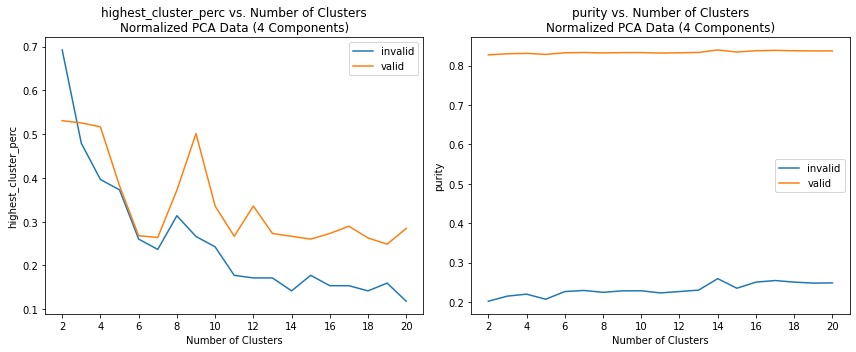

In [144]:
gmm.gmm_pipeline(df_pca,
                 category_column = "label",
                 title_suffix = "Normalized PCA Data (4 Components)",
                 columns_picked = None,
                 possible_K = np.arange(2,21),
                 apply_normalization=True,
                 apply_pca=False,
                 n_components_pca=10
                 
                )

labeled_data_indices = {'invalid': array([  2,  12,  13,  15,  25,  26,  31,  32,  37,  39,  41,  50,  56,
        57,  65,  85,  88,  90,  93,  94, 102, 114, 115, 132, 134, 138,
       139, 145, 147, 150, 153, 158, 159, 173, 178, 180, 186, 197, 198,
       218, 220, 222, 223, 227, 228, 230, 231, 253, 259, 271, 278, 294,
       298, 303, 306, 317, 318, 323, 326, 328, 330, 332, 341, 344, 347,
       373, 375, 376, 379, 396, 398, 401, 402, 403, 412, 414, 417, 418,
       419, 422, 424, 425, 433, 443, 454, 455, 457, 460, 481, 482, 484,
       490, 491, 495, 504, 511, 512, 513, 517, 523, 524, 526, 531, 532,
       534, 535, 548, 556, 561, 570, 571, 576, 577, 578, 579, 585, 596,
       597, 611, 612, 613, 614, 615, 619, 621, 623, 628, 632, 633, 638,
       643, 708, 715, 716, 722, 738, 743, 744, 745, 746, 751, 763, 766,
       769, 786, 789, 791, 792, 794, 795, 797, 815, 816, 817, 818, 830,
       832, 840, 855, 856, 858, 862, 872, 875, 919, 922, 933, 947, 948]), 'valid': array([  0,   1,  

<Figure size 432x288 with 0 Axes>

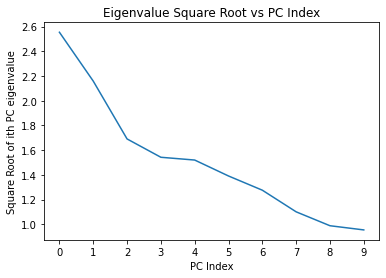

Explained Variance = [0.23266511 0.39889099 0.50085109 0.58570106 0.6680986  0.73710572
 0.7951759  0.83840167 0.8732456  0.90574275]


<Figure size 432x288 with 0 Axes>

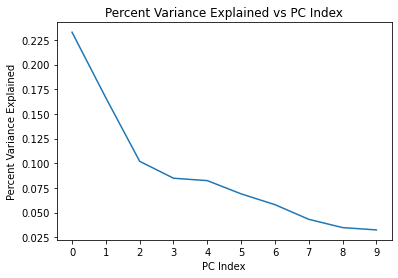

# -------- Part 1: GMM clustering with different Number of Clusters ----------- # 


------Working on clusters K=2-----
Using mixture model
reversing the pca transformation
reversing the normalizing transformation
Convergence status = True
Total time for GMM = 0.021517515182495117


------Working on clusters K=3-----
Using mixture model
reversing the pca transformation
reversing the normalizing transformation
Convergence status = True
Total time for GMM = 0.04861783981323242


------Working on clusters K=4-----
Using mixture model
reversing the pca transformation
reversing the normalizing transformation
Convergence status = True
Total time for GMM = 0.044033050537109375


------Working on clusters K=5-----
Using mixture model
reversing the pca transformation
reversing the normalizing transformation
Convergence status = True
Total time for GMM = 0.1268601417541504


------Working on clusters K=6-----
Using mixture model
reversing the pca transformation
reversing the normalizing transfor

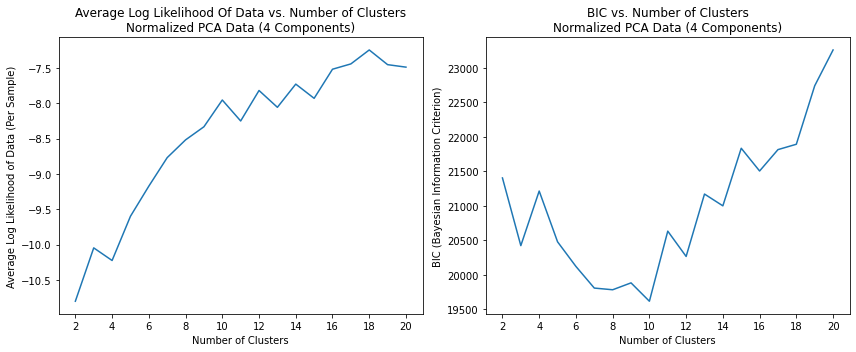

# --------- Part 2: computing the advanced statistics on the clustering ------- # 


----Working on Advanced Statistics for n_clusters = 2----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,123.332681,2.414465e+08,1884.599455,273.530223,1.849399,1.149470,2.303935,0.467393,0.957667,4.224491,...,0.182887,68.535102,-2.846030,72.238175,-3.816854,82.111249,5.865140,1.532896,89.501093,100.603911
1,197.612569,5.293133e+08,2414.004405,342.345653,2.080219,1.206279,2.164025,0.425377,-0.044162,0.155668,...,-0.022345,127.266881,-56.217135,129.150856,-55.638419,82.259397,1.705462,0.316228,95.017387,101.813817




Clustering Numbers By Neuroscience Category for K = 2


,classification,category,n_clusters,cl_0,cl_1
0,hard,invalid,2,122,47
1,hard,valid,2,372,408




Clustering Advanced Statistics By Neuroscience Category for K = 2


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,2,0,0.721893,2,0.207009
1,valid,hard,2,1,0.523077,2,0.828185




----Working on Advanced Statistics for n_clusters = 3----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,202.866310,5.481009e+08,2434.920277,351.600107,2.086754,1.208091,2.148050,0.429547,-0.040944,0.141786,...,-0.021519,131.090413,-59.171645,132.978406,-58.505063,82.402795,1.817947,0.350668,95.422822,102.133780
1,138.461143,2.937785e+08,1995.531116,288.910599,1.947886,1.167261,2.294648,0.493145,1.112212,4.756212,...,0.457863,62.129487,-12.491734,67.355285,-12.339316,73.885875,9.458309,2.581652,84.512618,94.810801
2,111.422687,2.015503e+08,1820.248738,255.615685,1.792136,1.139310,2.322123,0.441973,0.782968,3.614438,...,-0.012045,71.565566,3.791884,74.142667,2.074777,87.297969,3.076765,0.716666,92.587664,104.034525




Clustering Numbers By Neuroscience Category for K = 3


,classification,category,n_clusters,cl_0,cl_1,cl_2
0,hard,invalid,3,42,57,70
1,hard,valid,3,401,133,246




Clustering Advanced Statistics By Neuroscience Category for K = 3


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,3,2,0.414201,3,0.216499
1,valid,hard,3,0,0.514103,2,0.830241




----Working on Advanced Statistics for n_clusters = 4----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,195.780007,5.187663e+08,2371.989353,350.104289,1.971149,1.183408,2.172087,0.445358,-0.052823,0.173701,...,-0.026921,112.878322,-59.773385,114.981331,-59.120904,82.257103,2.038244,0.403087,95.692253,102.856929
1,121.904246,2.395826e+08,1877.147473,271.106909,1.808084,1.138578,2.322416,0.469511,1.014587,4.431267,...,0.247729,63.105205,-7.423867,67.269627,-8.117617,79.456544,7.017046,1.858196,87.829594,99.000355
2,144.517973,3.229235e+08,2116.766878,268.768039,2.292079,1.249830,2.215479,0.402815,0.624113,2.817352,...,-0.006431,130.182030,14.353261,131.805893,12.768168,88.945966,1.319675,0.262645,93.069199,102.303589
3,682.222180,2.561120e+09,4226.285234,1074.319716,1.639328,1.056601,0.984063,-0.017495,0.649480,-1.834322,...,0.211560,503.448422,-1333.388678,504.508875,-1319.630761,17.661127,0.782988,-0.479822,69.519674,44.656998




Clustering Numbers By Neuroscience Category for K = 4


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3
0,hard,invalid,4,44,101,24,0
1,hard,valid,4,381,268,130,1




Clustering Advanced Statistics By Neuroscience Category for K = 4


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,4,1,0.597633,2,0.212666
1,valid,hard,4,0,0.488462,2,0.829411




----Working on Advanced Statistics for n_clusters = 5----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,205.633420,5.572601e+08,2464.651448,353.266855,2.083837,1.207371,2.156635,0.433764,-0.043011,0.144519,...,-0.019891,132.149179,-54.532193,133.848608,-54.080643,82.281750,1.000640,0.123918,95.623687,101.639313
1,168.818001,4.386037e+08,2278.858259,292.519997,1.861941,1.148130,2.303926,0.444937,0.335027,1.800240,...,0.487281,76.897681,-39.542004,82.989809,-36.570245,82.184450,13.544899,3.736079,89.896722,106.207276
2,125.642810,2.579162e+08,1989.754417,256.238489,1.903959,1.156816,2.309407,0.433877,1.310729,5.508844,...,-0.012036,74.504958,5.651978,77.209118,3.220961,92.009704,3.971292,1.002358,93.323918,107.406642
3,682.222180,2.561120e+09,4226.285234,1074.319716,1.639328,1.056601,0.984063,-0.017495,0.649480,-1.834322,...,0.211560,503.448422,-1333.388678,504.508875,-1319.630761,17.661127,0.782988,-0.479822,69.519674,44.656998
4,97.253589,1.238317e+08,1550.320674,281.972655,1.823156,1.154374,2.276840,0.501750,0.453590,2.408722,...,0.247009,59.680644,-8.502703,63.482911,-8.712498,67.447887,4.926975,1.218775,83.955560,88.364464




Clustering Numbers By Neuroscience Category for K = 5


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4
0,hard,invalid,5,37,25,58,0,49
1,hard,valid,5,365,69,214,1,131




Clustering Advanced Statistics By Neuroscience Category for K = 5


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,5,2,0.343195,3,0.211603
1,valid,hard,5,0,0.467949,3,0.829181




----Working on Advanced Statistics for n_clusters = 6----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,117.214712,2.243072e+08,1892.654950,255.779024,1.849182,1.146001,2.314338,0.439110,1.263369,5.367851,...,-0.011784,73.069905,4.523002,75.688163,2.011695,90.201511,3.464384,0.849106,91.527955,104.781141
1,163.652309,4.205107e+08,2404.773930,256.803817,2.060233,1.187512,2.312427,0.408417,0.796446,3.444078,...,0.218225,67.803144,-19.214898,72.683235,-18.255919,86.850600,11.053326,3.013930,94.391910,111.373143
2,176.288496,4.280773e+08,2018.943037,383.467744,1.767360,1.149251,2.135557,0.502839,-0.053772,0.183063,...,-0.027977,111.815583,-54.042836,113.902232,-53.551317,80.226394,1.532454,0.251750,100.222063,104.114637
3,253.530423,7.752412e+08,3237.841695,289.919746,2.682769,1.317716,2.193688,0.294574,-0.019011,0.070481,...,-0.004510,171.913103,-59.013189,172.986016,-58.512423,85.515781,0.528232,0.025646,86.379519,96.552629
4,104.768793,1.408454e+08,1495.412024,313.480084,1.749420,1.142556,2.265776,0.549491,0.119853,1.244398,...,0.494793,60.933646,-12.295448,65.717883,-11.103827,61.606437,6.427710,1.668905,80.742067,83.055251
5,682.222180,2.561120e+09,4226.285234,1074.319716,1.639328,1.056601,0.984063,-0.017495,0.649480,-1.834322,...,0.211560,503.448422,-1333.388678,504.508875,-1319.630761,17.661127,0.782988,-0.479822,69.519674,44.656998




Clustering Numbers By Neuroscience Category for K = 6


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5
0,hard,invalid,6,61,36,28,12,32,0
1,hard,valid,6,225,83,251,121,99,1




Clustering Advanced Statistics By Neuroscience Category for K = 6


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,6,0,0.360947,4,0.210715
1,valid,hard,6,2,0.321795,4,0.828988




----Working on Advanced Statistics for n_clusters = 7----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,173.619096,4.162158e+08,2773.288440,187.031898,3.782510,1.567646,2.034411,0.268039,0.133755,0.802408,...,0.029717,137.478860,-3.477186,139.548899,-3.112392,71.628107,4.272000,1.074698,72.734979,81.003278
1,119.094443,1.963461e+08,1592.442743,325.557216,1.863600,1.163037,2.240038,0.558640,0.793008,3.646280,...,0.771579,65.445711,-15.141173,72.126055,-13.205324,72.449228,12.221519,3.405285,89.291627,96.976440
2,117.547671,2.248562e+08,1919.761338,248.795534,1.859974,1.152309,2.325585,0.430060,0.777875,3.609872,...,-0.020091,65.026895,-3.217491,67.591494,-4.922387,89.527033,2.875626,0.662523,93.143613,105.559685
3,241.945300,6.968561e+08,2881.165247,358.574310,2.199691,1.226731,2.145632,0.427076,-0.039675,0.135913,...,-0.026422,99.774965,-79.980772,102.458642,-78.476460,87.514901,4.210918,1.038151,99.259532,110.405931
4,178.125241,4.543122e+08,2104.435230,359.235973,1.866585,1.165060,2.160016,0.446871,-0.046290,0.147623,...,-0.018712,145.374636,-51.340401,146.869646,-51.130303,80.966935,0.409799,-0.055853,95.517157,99.790671
5,167.659686,4.546078e+08,2539.585995,246.147696,1.886445,1.126894,2.423869,0.409788,2.624706,10.140131,...,0.157412,87.300209,20.484278,90.836249,16.624141,89.377162,7.046541,1.939732,88.662140,105.887531
6,98.567623,1.303492e+08,1412.557764,317.817173,1.483484,1.085988,2.275812,0.543105,-0.010649,0.742650,...,0.240277,60.936719,-12.744729,64.961726,-11.920658,64.616331,5.691497,1.409643,83.082906,87.145090




Clustering Numbers By Neuroscience Category for K = 7


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6
0,hard,invalid,7,4,18,54,22,16,26,29
1,hard,valid,7,36,54,191,125,243,57,74




Clustering Advanced Statistics By Neuroscience Category for K = 7


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,7,2,0.319527,5,0.221258
1,valid,hard,7,4,0.311538,4,0.831273




----Working on Advanced Statistics for n_clusters = 8----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,127.125329,2.574212e+08,1851.949132,298.178643,1.804689,1.129518,2.244709,0.483742,2.415916,9.492081,...,-0.000276,90.018238,16.330397,93.072680,12.329563,92.510245,6.081810,1.638992,90.744754,106.341821
1,180.639541,4.649464e+08,2138.688371,357.641825,1.876301,1.166432,2.163330,0.442048,-0.046476,0.145253,...,-0.017309,143.368358,-55.764012,144.884745,-55.510702,81.786165,0.401236,-0.057786,95.941629,100.559877
2,95.466456,1.277960e+08,1444.979331,302.716200,1.395476,1.066908,2.313181,0.519382,-0.000473,0.789627,...,0.051775,64.681251,-0.550126,67.595625,-0.773303,73.428665,2.976648,0.633757,89.912957,95.242800
3,159.542060,4.041381e+08,2509.041460,219.847828,2.306661,1.240512,2.302612,0.369501,0.282923,1.646741,...,0.125864,58.259943,-15.774280,62.893201,-14.217046,83.035855,10.887376,2.930418,85.707674,103.875640
4,118.992492,1.982835e+08,1644.803968,313.720491,1.806702,1.145817,2.325691,0.557259,1.006865,4.484995,...,0.882389,65.344357,-11.797833,71.488216,-11.008505,69.884872,8.605117,2.402296,87.693786,91.728023
5,118.073843,2.323481e+08,2032.154139,222.806418,1.981161,1.176872,2.354783,0.399330,0.636281,3.080847,...,-0.027826,60.599855,-3.287659,63.029573,-4.878957,88.411753,2.338774,0.501591,92.695596,104.790032
6,239.299493,6.829602e+08,2889.346986,349.434818,2.404348,1.271136,2.115659,0.417865,-0.032094,0.126949,...,-0.027599,115.576173,-62.397127,117.988064,-61.121540,81.754677,3.898246,0.950172,93.551472,102.870980
7,682.222180,2.561120e+09,4226.285234,1074.319716,1.639328,1.056601,0.984063,-0.017495,0.649480,-1.834322,...,0.211560,503.448422,-1333.388678,504.508875,-1319.630761,17.661127,0.782988,-0.479822,69.519674,44.656998




Clustering Numbers By Neuroscience Category for K = 8


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7
0,hard,invalid,8,23,17,28,23,28,34,16,0
1,hard,valid,8,82,241,72,54,59,128,143,1




Clustering Advanced Statistics By Neuroscience Category for K = 8


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,8,5,0.201183,5,0.228555
1,valid,hard,8,1,0.308974,5,0.832854




----Working on Advanced Statistics for n_clusters = 9----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,220.696189,6.249626e+08,2647.436757,347.528593,2.181688,1.223700,2.162395,0.402478,-0.034532,0.106808,...,-0.017756,148.892612,-60.533758,150.270511,-60.138660,82.125313,0.339811,-0.057325,92.890093,99.097428
1,388.327797,1.286498e+09,4978.119617,259.089859,4.033215,1.581586,2.098680,0.183123,0.260986,0.748152,...,0.030189,129.287075,-123.708447,131.469796,-121.763843,74.271304,4.320953,1.108515,73.347383,87.392357
2,123.166320,2.193808e+08,1779.814388,292.745810,1.973187,1.178206,2.342113,0.527673,1.097961,4.759601,...,0.899443,65.813574,-13.832777,71.902496,-13.189794,67.440863,8.382824,2.338815,86.431802,89.722330
3,166.304987,3.913786e+08,1893.676573,384.714781,1.710546,1.138657,2.118538,0.508916,-0.054244,0.184180,...,-0.029838,110.243845,-52.556811,112.816119,-51.612850,80.648761,3.671827,0.851879,100.324256,105.856656
4,90.727946,1.015448e+08,1545.110110,262.552763,1.874133,1.166906,2.269670,0.472161,-0.016733,0.766851,...,0.090830,64.011848,-5.179038,66.957719,-5.343399,68.559079,3.076149,0.661010,78.968993,84.460554
5,115.994638,2.294274e+08,1937.232027,241.014429,1.699746,1.116916,2.386335,0.425546,0.512728,2.643078,...,-0.034526,59.385534,-3.633183,61.792456,-5.109026,85.143971,2.050832,0.401125,92.052960,102.958169
6,144.784877,3.528570e+08,2113.130628,273.366074,1.619077,1.098806,2.342715,0.446780,0.225147,1.485564,...,0.178853,59.219198,-13.089858,64.385382,-11.099462,86.514160,12.130388,3.283960,94.050093,112.216181
7,120.816247,2.491826e+08,1904.306659,267.601738,1.827207,1.127751,2.303903,0.449465,2.676918,10.403724,...,0.004598,94.327701,22.845391,97.226571,18.201865,89.683135,5.787131,1.551599,88.050280,103.289433
8,139.436655,2.520628e+08,2006.294248,286.314307,2.595988,1.327375,2.064389,0.455085,0.538411,2.760407,...,0.019144,65.460608,-14.112116,68.703261,-14.367294,105.144163,5.359336,1.438774,102.770086,119.056603




Clustering Numbers By Neuroscience Category for K = 9


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8
0,hard,invalid,9,16,4,25,15,16,38,24,19,12
1,hard,valid,9,226,15,52,143,59,123,48,74,40




Clustering Advanced Statistics By Neuroscience Category for K = 9


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,9,5,0.224852,6,0.227658
1,valid,hard,9,0,0.289744,5,0.832659




----Working on Advanced Statistics for n_clusters = 10----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,253.096381,7.489321e+08,3433.330654,252.026870,3.134758,1.415935,2.168273,0.287770,-0.025483,0.158008,...,-0.006240,118.449085,-59.955772,120.203547,-59.222877,84.244263,1.734095,0.362061,86.207935,97.515793
1,167.378580,3.944428e+08,1853.982449,399.881481,1.625706,1.122053,2.100616,0.534245,-0.049882,0.184166,...,-0.032078,107.344480,-43.213314,110.451553,-41.795540,79.713853,5.973146,1.502491,101.351584,108.012596
2,118.161183,1.773177e+08,1625.809000,325.100476,1.976454,1.191220,2.123125,0.527023,0.730447,3.508403,...,-0.015278,65.024555,-8.737563,67.928667,-10.018287,87.387092,3.857204,0.951093,90.184324,101.076055
3,128.433188,2.700638e+08,1960.791198,277.545670,1.944045,1.152783,2.270540,0.457421,2.871430,11.077937,...,-0.000926,97.890604,23.888758,100.613178,18.801364,88.826611,5.210281,1.398557,87.915027,102.087804
4,121.993026,2.086196e+08,1708.300947,307.250472,1.914397,1.167404,2.326441,0.550756,1.093285,4.780035,...,0.925957,65.752820,-10.989308,71.987544,-10.269130,67.545779,8.652685,2.422669,86.101272,89.355687
5,170.675411,4.686412e+08,2526.459019,246.494350,1.834684,1.134963,2.380662,0.395413,0.435013,2.152140,...,0.179226,60.198861,-16.381519,65.430622,-14.486387,87.209542,12.854848,3.500886,93.050606,113.288219
6,95.610217,1.203265e+08,1605.372184,260.079405,1.920885,1.177901,2.256814,0.464039,-0.013081,0.795450,...,0.083525,61.837784,-4.526178,65.052240,-4.374012,77.542231,4.312173,1.034774,85.029084,93.920585
7,175.970996,4.471894e+08,2054.404974,363.211916,1.859923,1.164525,2.149184,0.445962,-0.041988,0.140217,...,-0.014511,156.727388,-48.556244,158.103126,-48.383540,80.987110,0.278474,-0.089127,95.294753,99.173145
8,259.471916,7.762541e+08,3050.053457,364.795065,2.067939,1.191749,2.204309,0.410024,-0.041023,0.089882,...,-0.028231,107.447460,-102.860555,109.313656,-101.971001,84.434977,0.692701,0.028052,96.114288,104.589728
9,123.944217,2.840919e+08,2145.871395,212.089311,1.664178,1.101134,2.469516,0.381894,0.704254,3.268367,...,-0.037418,59.234155,-3.692773,61.677552,-5.389981,87.709722,2.484323,0.527848,95.116628,107.747226




Clustering Numbers By Neuroscience Category for K = 10


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9
0,hard,invalid,10,15,8,11,17,24,17,29,8,9,31
1,hard,valid,10,61,90,72,58,52,39,76,182,65,85




Clustering Advanced Statistics By Neuroscience Category for K = 10


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,10,9,0.183432,7,0.233076
1,valid,hard,10,7,0.233333,7,0.833833




----Working on Advanced Statistics for n_clusters = 11----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,144.527317,3.547321e+08,2199.620593,267.149230,1.756112,1.102543,2.345761,0.443787,2.689260,10.392127,...,0.020459,69.841699,1.109754,73.625955,-2.688014,80.809238,8.687616,2.337166,81.052276,97.860076
1,161.441275,4.211950e+08,2239.555953,291.897055,1.768021,1.138917,2.341258,0.403932,0.734161,2.754105,...,0.007566,91.139101,-46.221853,93.921567,-46.449956,84.713022,3.936033,0.937163,122.058608,126.232437
2,118.068402,1.918132e+08,1564.116371,340.919048,1.663962,1.120705,2.180556,0.546543,1.021802,4.527505,...,-0.019788,84.553846,12.235816,87.108818,10.092232,87.217948,3.121062,0.754792,92.131074,102.037126
3,131.660030,3.017590e+08,2467.569947,144.215668,2.475620,1.279191,2.384757,0.278579,0.517344,2.688017,...,-0.021371,58.972424,-5.533553,61.711109,-6.341341,117.668283,4.185969,1.102681,108.309433,131.288874
4,123.686202,2.389965e+08,1663.437046,323.393080,1.713642,1.134610,2.181777,0.492111,-0.050674,0.344111,...,0.050465,77.886182,-35.223794,81.919970,-33.521055,69.347362,8.579687,2.203365,87.183341,95.272221
5,268.504177,7.943046e+08,3289.855296,335.339133,2.662001,1.320517,2.134707,0.386917,-0.034385,0.131865,...,-0.017768,116.625769,-63.440375,118.492457,-62.597120,85.172023,1.616001,0.331615,92.524097,102.346120
6,124.948409,2.212107e+08,1755.623858,302.599591,1.957822,1.177942,2.316251,0.540539,0.792974,3.697066,...,0.896087,65.774367,-11.629721,72.029051,-10.303059,67.610134,9.114895,2.542293,84.525719,88.806838
7,682.222180,2.561120e+09,4226.285234,1074.319716,1.639328,1.056601,0.984063,-0.017495,0.649480,-1.834322,...,0.211560,503.448422,-1333.388678,504.508875,-1319.630761,17.661127,0.782988,-0.479822,69.519674,44.656998
8,375.025094,1.351806e+09,5387.315161,132.252680,2.369943,1.187339,2.802866,0.146939,0.560515,2.484422,...,0.133141,56.230206,-25.052211,59.531927,-24.501214,111.491630,6.259832,1.747117,93.437933,127.113348
9,88.317281,1.134726e+08,1668.173883,225.269681,1.815196,1.150238,2.353900,0.422479,0.150895,1.345174,...,0.010580,56.459788,-3.987510,59.145743,-4.664173,80.052347,2.637072,0.545347,90.379437,99.004610




Clustering Numbers By Neuroscience Category for K = 11


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10
0,hard,invalid,11,15,5,22,13,13,15,31,0,6,33,16
1,hard,valid,11,64,9,97,41,81,113,56,1,6,84,228




Clustering Advanced Statistics By Neuroscience Category for K = 11


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,11,9,0.195266,7,0.235439
1,valid,hard,11,10,0.292308,6,0.834345




----Working on Advanced Statistics for n_clusters = 12----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,134.298634,3.143969e+08,2169.540522,236.236361,2.062785,1.202711,2.359317,0.371187,0.961481,3.632715,...,-0.016322,84.895716,-12.194319,87.554709,-13.262623,85.126138,3.924435,0.944597,122.160734,126.470970
1,147.964411,3.446042e+08,1961.981785,302.995326,1.980252,1.189284,2.191468,0.376444,-0.048451,0.154070,...,-0.025626,100.551700,-116.384972,102.578501,-115.683008,85.548640,0.822788,0.014293,100.993144,106.827338
2,96.213058,1.375958e+08,1708.659923,239.323230,1.840641,1.151373,2.324417,0.434739,0.496929,2.654612,...,-0.016997,60.175025,-5.280497,62.595881,-6.822582,81.189430,1.940169,0.361843,85.497078,95.196539
3,144.218091,3.443336e+08,2117.834098,286.416257,1.777243,1.113584,2.321071,0.466479,2.693453,10.361820,...,0.018616,98.534258,30.704922,101.524430,26.212559,82.450771,6.260519,1.680264,86.240505,99.632733
4,326.377033,1.157546e+09,4879.827366,113.997452,2.334643,1.193077,2.784970,0.144977,0.455083,2.111301,...,0.123838,58.556518,-17.397508,61.772883,-16.866359,116.799762,5.860154,1.629755,104.215568,136.042619
5,185.794530,4.891045e+08,2165.849213,364.220579,1.843329,1.158544,2.165084,0.442038,-0.041063,0.133941,...,-0.013970,156.431670,-49.547284,157.802914,-49.343027,81.783929,0.272124,-0.086967,95.537577,100.031378
6,102.692269,1.467089e+08,1432.480535,324.293740,1.459499,1.080226,2.273569,0.548133,-0.002290,0.766883,...,0.258521,62.339876,-14.418517,66.483932,-13.467492,64.338895,6.059271,1.517029,82.640927,86.907129
7,126.464096,2.347927e+08,1835.001022,287.424957,1.976939,1.175293,2.359827,0.526591,1.201904,5.199946,...,0.977940,64.900584,-9.751658,71.405654,-8.995971,69.600362,9.496153,2.678485,84.265383,89.707471
8,131.711137,2.680531e+08,2040.520454,256.131589,2.103143,1.205245,2.236717,0.421796,1.110176,4.858167,...,-0.024783,64.890221,-7.719063,68.067420,-9.208561,108.756533,5.774026,1.549513,102.411602,122.544812
9,157.582295,3.684878e+08,2176.207195,289.424598,2.375693,1.272395,2.070067,0.418629,0.170148,1.117305,...,0.026257,70.380945,-40.336938,75.869056,-37.165092,93.460949,15.732270,4.305610,96.472584,118.487658




Clustering Numbers By Neuroscience Category for K = 12


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11
0,hard,invalid,12,5,8,30,13,10,8,29,19,18,8,7,14
1,hard,valid,12,12,35,116,62,4,182,73,43,60,26,86,81




Clustering Advanced Statistics By Neuroscience Category for K = 12


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,12,2,0.177515,8,0.245860
1,valid,hard,12,5,0.233333,7,0.836603




----Working on Advanced Statistics for n_clusters = 13----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,108.110671,2.152114e+08,2131.372489,174.391038,2.151693,1.196325,2.414312,0.353080,0.810523,3.658820,...,-0.013306,64.557945,-3.556613,66.784874,-5.807478,54.087696,2.087409,0.340163,58.210134,64.570749
1,405.560375,1.371319e+09,5223.509434,261.630589,3.435707,1.448433,2.293486,0.251783,0.253031,1.031500,...,0.002740,129.749410,-6.256072,131.743533,-5.363987,94.711631,4.385765,1.228529,86.549615,108.288277
2,131.030732,2.941289e+08,1877.861841,282.755882,1.894020,1.167069,2.180228,0.407120,-0.021278,0.344386,...,0.007723,79.368358,-58.028848,84.241119,-55.115014,80.893276,13.203774,3.517343,91.880733,108.165219
3,147.868233,3.671467e+08,2255.623456,260.520362,1.802281,1.112779,2.362160,0.435170,2.815557,10.877225,...,0.096769,69.041817,1.842907,73.055250,-1.969455,90.677073,8.855722,2.429138,89.321623,108.114019
4,141.922804,2.680341e+08,2508.295931,162.214089,3.944545,1.613820,1.993590,0.268193,0.231308,1.323345,...,0.050735,86.118876,-27.813160,89.079065,-27.114400,91.468232,5.658089,1.497024,91.862110,104.580516
5,146.539929,3.508101e+08,2063.417461,296.869906,1.826527,1.157208,2.296976,0.437131,0.548473,2.141405,...,-0.026492,101.021051,-6.770943,103.657605,-7.044661,77.667290,4.261325,1.022106,115.185797,117.704601
6,126.295109,2.135732e+08,1531.236990,374.173923,1.574249,1.104125,2.140401,0.586636,0.947623,4.269686,...,-0.019061,84.785328,12.900100,87.511848,11.056722,85.387519,3.708808,0.920666,90.969102,100.555938
7,116.368245,2.489524e+08,2239.932344,156.588512,2.104083,1.200436,2.440842,0.306894,0.449665,2.498921,...,-0.011268,56.337993,-5.413545,58.920623,-6.465706,114.989040,2.994305,0.746193,108.176634,129.229545
8,99.685035,1.295317e+08,1372.110948,331.707464,1.419991,1.074168,2.263468,0.561911,0.007085,0.834728,...,0.229543,61.281502,-9.227039,65.245845,-8.525076,67.080810,5.452373,1.350517,85.064296,89.395768
9,231.422668,6.772470e+08,2821.043181,333.550411,2.265635,1.237809,2.184949,0.371997,-0.027121,0.076711,...,-0.016342,158.866607,-58.195762,160.112004,-57.779997,83.296517,0.326051,-0.052754,92.915478,99.917053




Clustering Numbers By Neuroscience Category for K = 13


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12
0,hard,invalid,13,10,2,9,20,5,5,16,26,25,13,16,22,0
1,hard,valid,13,46,14,33,52,18,20,81,61,76,174,35,169,1




Clustering Advanced Statistics By Neuroscience Category for K = 13


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,13,7,0.153846,7,0.216932
1,valid,hard,13,9,0.223077,7,0.830335




----Working on Advanced Statistics for n_clusters = 14----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,105.791464,2.027227e+08,1787.325906,234.833967,1.832580,1.149303,2.252892,0.395605,0.236511,1.585167,...,0.019959,60.246580,-20.422923,65.581520,-18.159251,96.493849,14.879136,4.043212,93.556513,118.009461
1,173.601268,4.142905e+08,2088.904598,364.233045,1.907878,1.178596,2.150760,0.507710,-0.012147,0.409026,...,-0.028441,116.566723,-8.216823,118.524332,-8.212160,79.083641,1.622604,0.301400,96.986629,101.321620
2,120.222905,2.052631e+08,1969.634016,238.345062,2.316912,1.262064,2.219585,0.411293,0.459156,2.580582,...,-0.007887,58.750585,-6.764686,61.385211,-7.755011,111.976780,2.773067,0.701477,106.736737,124.307783
3,164.213420,4.573577e+08,2653.292603,202.117021,1.802681,1.130707,2.540966,0.338874,0.622992,2.685092,...,0.035428,66.702955,-2.759068,69.279911,-3.723595,95.904058,2.627404,0.610442,116.949762,128.509651
4,146.513711,3.486629e+08,2179.364099,276.691198,1.910188,1.136535,2.338521,0.466967,3.016993,11.607677,...,0.225941,92.238592,24.916246,95.969158,20.366719,80.403072,7.205238,1.986838,81.160620,94.698755
5,499.768427,1.725235e+09,6025.248270,341.713461,3.610456,1.480981,2.218026,0.297095,0.294989,0.901151,...,0.014337,142.104503,-9.634138,144.392998,-7.872364,90.935352,6.005404,1.721228,90.616979,111.634609
6,148.813652,3.565526e+08,1856.911372,332.507768,1.758043,1.143373,2.160697,0.420230,-0.038496,0.142481,...,-0.032851,120.318342,-75.398059,123.293664,-73.769982,84.769847,6.158546,1.538132,100.747227,110.177104
7,141.453355,2.684971e+08,1774.065234,340.148443,2.040777,1.201538,2.290598,0.584119,0.950869,4.180826,...,1.277622,71.840260,-22.699135,79.579101,-20.142775,69.849508,11.503478,3.302152,95.941432,97.592593
8,250.956729,7.296049e+08,3167.961042,319.523576,2.346641,1.251412,2.229246,0.395802,-0.059061,0.197435,...,-0.029991,66.771185,-91.493740,68.912792,-90.814432,88.272407,0.628002,0.019760,97.222162,107.787665
9,184.817609,4.827631e+08,2091.675676,379.295983,1.784329,1.147338,2.146033,0.458275,-0.039462,0.125780,...,-0.013884,163.353456,-48.035527,164.684843,-47.834777,79.679962,0.282575,-0.087144,94.232992,97.820340




Clustering Numbers By Neuroscience Category for K = 14


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13
0,hard,invalid,14,8,12,12,15,19,2,11,10,14,6,18,6,6,30
1,hard,valid,14,27,63,49,17,44,11,64,23,85,176,54,44,25,98




Clustering Advanced Statistics By Neuroscience Category for K = 14


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,14,13,0.177515,9,0.233208
1,valid,hard,14,9,0.225641,8,0.833862




----Working on Advanced Statistics for n_clusters = 15----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,137.038605,2.455900e+08,1567.910390,391.382358,1.566592,1.102895,2.081231,0.609225,0.250815,1.900573,...,0.081182,58.503269,-17.067060,62.839542,-16.237892,81.659766,8.659116,2.299241,78.203026,93.059107
1,133.393079,2.714204e+08,1958.876902,304.927858,2.045103,1.163916,2.252707,0.511501,4.358187,16.382519,...,0.169300,79.844677,9.071249,83.193176,1.736703,73.250650,5.385698,1.468606,81.658785,89.714546
2,210.075520,5.680252e+08,2419.736313,379.972446,1.864146,1.159719,2.162203,0.470399,-0.053188,0.168187,...,-0.026552,112.885151,-74.616654,114.696843,-74.174619,79.871196,0.450870,-0.052182,94.055216,99.380257
3,136.466772,2.429274e+08,2812.070967,69.946834,4.893701,1.817107,1.974315,0.145491,0.434291,1.892860,...,0.071171,99.617940,-21.493441,101.667368,-21.747999,91.581733,2.608238,0.659521,94.792120,103.830723
4,178.549405,4.623608e+08,2174.185868,339.380735,2.131397,1.222831,2.128057,0.409947,-0.030272,0.094151,...,-0.013552,170.759591,-32.110145,172.302603,-31.608696,82.828740,1.959064,0.404310,96.998007,102.334755
5,117.169823,1.842671e+08,1505.721497,353.595920,1.544261,1.100470,2.197321,0.565592,0.580894,2.909374,...,-0.020508,81.958879,9.215250,84.169154,7.473260,81.417553,1.198750,0.182941,92.914261,98.702739
6,682.222180,2.561120e+09,4226.285234,1074.319716,1.639328,1.056601,0.984063,-0.017495,0.649480,-1.834322,...,0.211560,503.448422,-1333.388678,504.508875,-1319.630761,17.661127,0.782988,-0.479822,69.519674,44.656998
7,122.683876,2.188473e+08,1727.646055,305.034779,1.787380,1.142303,2.340884,0.541873,0.487310,2.579790,...,0.767395,64.110729,-11.114588,69.725360,-9.864367,63.637257,7.477076,2.033721,82.514429,85.324626
8,152.366291,4.140717e+08,2270.597861,244.019753,1.737508,1.117495,2.335584,0.351084,0.093877,0.797417,...,0.087263,77.769436,-57.282077,82.924158,-54.341794,87.412874,13.930249,3.750842,91.504249,112.811493
9,411.820960,1.368013e+09,5165.066897,301.655467,3.497359,1.466386,2.212189,0.313031,0.329041,1.312180,...,-0.003818,116.955003,-8.455664,119.069945,-7.693550,85.857109,4.249694,1.175701,82.528037,100.813197




Clustering Numbers By Neuroscience Category for K = 15


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14
0,hard,invalid,15,9,8,14,3,11,13,0,23,10,4,1,7,33,12,21
1,hard,valid,15,23,23,216,12,125,71,1,45,29,18,6,23,45,63,80




Clustering Advanced Statistics By Neuroscience Category for K = 15


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,15,12,0.195266,8,0.248783
1,valid,hard,15,2,0.276923,7,0.837236




----Working on Advanced Statistics for n_clusters = 16----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,166.470002,4.002837e+08,1881.192732,388.100103,1.722233,1.142482,2.105060,0.508500,-0.036909,0.117634,...,-0.035501,130.288547,-31.245226,133.058824,-29.965110,76.886353,5.607766,1.400028,101.136950,106.070035
1,149.509850,3.670663e+08,2088.364105,291.205370,1.823302,1.140482,2.182012,0.443327,0.600388,2.790168,...,0.038008,62.838079,-24.849296,69.067959,-22.096452,90.176360,18.822802,5.169347,87.733061,114.098809
2,120.631870,2.022251e+08,1506.065406,361.085232,1.422475,1.072984,2.214849,0.579318,0.256346,1.788293,...,0.056318,84.919828,12.950921,87.577276,12.117699,76.446216,2.509753,0.548340,85.513129,91.872338
3,117.066054,2.461785e+08,1949.012115,243.686432,1.834602,1.159623,2.393853,0.402300,0.841934,3.207507,...,0.015317,74.313089,-6.236817,77.171141,-7.133026,83.074708,3.789474,0.894147,128.012616,129.753058
4,156.413284,3.706452e+08,2061.592404,312.876400,1.785372,1.141522,2.239292,0.430860,-0.081819,0.283416,...,-0.025400,79.442422,-82.671324,81.651127,-82.360029,81.861658,1.028778,0.079285,90.096417,98.182633
5,113.482612,2.154999e+08,1697.715254,290.107435,1.501671,1.069223,2.356331,0.507013,1.268334,5.382925,...,0.395430,64.008129,-4.995070,69.177780,-5.360104,74.417847,9.872335,2.675734,83.603423,95.202907
6,126.500057,2.255996e+08,1803.201618,289.532315,2.100387,1.209862,2.334313,0.527814,0.628085,3.108705,...,1.118278,66.405171,-17.596736,73.450951,-15.254507,68.945484,10.285312,2.912121,86.789664,90.829118
7,140.839857,3.265905e+08,2184.896390,259.422165,2.015072,1.161086,2.319376,0.429311,3.065265,11.757728,...,0.006179,92.179448,16.621910,94.703645,11.022929,89.034048,4.156857,1.104887,87.690209,101.902357
8,307.249536,9.600503e+08,3775.648679,332.721335,2.357913,1.241935,2.266026,0.381743,-0.052061,0.188980,...,-0.033738,63.542254,-99.414771,65.893440,-98.302712,93.468688,1.666898,0.339948,96.826748,112.078825
9,142.111805,3.087407e+08,2159.224580,255.678441,2.015364,1.188605,2.284089,0.420867,0.710467,3.466039,...,-0.008546,57.775037,-9.265066,60.686899,-10.374368,115.058874,3.965720,1.049152,108.745691,129.125467




Clustering Numbers By Neuroscience Category for K = 16


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15
0,hard,invalid,16,6,5,14,8,11,13,18,12,14,17,0,3,21,6,13,8
1,hard,valid,16,84,27,32,13,48,33,30,56,49,64,1,25,86,36,7,189




Clustering Advanced Statistics By Neuroscience Category for K = 16


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,16,12,0.124260,10,0.259385
1,valid,hard,16,15,0.242308,9,0.839533




----Working on Advanced Statistics for n_clusters = 17----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,150.605779,2.881655e+08,3009.090460,61.830679,5.241222,1.892870,1.933391,0.122733,0.376862,1.594992,...,0.102651,100.433240,-30.958984,102.430442,-30.958566,89.513836,2.144039,0.534911,95.435748,102.715003
1,144.414904,3.371793e+08,1943.866276,314.206305,1.906736,1.178464,2.195079,0.447949,0.327954,1.350468,...,-0.011460,113.096053,-5.926267,116.673400,-4.713220,79.237916,8.871608,2.332537,110.460465,117.442698
2,193.286557,5.945042e+08,3182.173563,162.246636,1.963988,1.132464,2.622146,0.290556,1.565699,6.221750,...,0.034161,60.604155,-4.182961,63.122958,-7.079927,80.462599,3.076843,0.725256,83.646822,98.972539
3,354.595735,1.096748e+09,4357.501385,331.871145,3.969817,1.589110,1.954802,0.348419,0.030506,0.088510,...,-0.029298,148.714524,-32.144509,149.952791,-31.430243,54.391638,1.404857,0.274518,61.457891,65.333820
4,255.613829,7.407625e+08,2930.845034,391.509785,2.041836,1.193596,2.156647,0.475778,-0.043599,0.142732,...,-0.034022,100.735324,-65.617609,102.977086,-64.667211,83.512581,2.190526,0.469430,98.759868,106.899164
5,134.236385,2.518441e+08,1833.798019,316.937664,1.890682,1.172970,2.178531,0.502880,0.617792,3.084719,...,-0.019944,61.364789,-9.734396,64.365284,-10.592071,104.548736,4.144587,1.072478,106.585530,121.840530
6,120.679925,2.381077e+08,1839.094108,283.267282,1.854561,1.135783,2.245574,0.467394,2.702020,10.525239,...,-0.005179,84.377839,10.213995,87.755210,6.004444,91.205158,7.512764,2.037436,87.429452,104.546655
7,131.629210,2.551454e+08,1804.236180,312.205520,1.798802,1.143058,2.313563,0.538623,0.673354,3.233625,...,0.694372,64.712305,-12.672010,70.402857,-11.528986,69.681619,8.687061,2.385143,85.444133,91.466237
8,121.453705,3.245941e+08,2548.578686,88.066407,1.835210,1.125868,2.656620,0.210208,0.356113,2.180432,...,0.008657,57.473048,-10.633299,59.912765,-11.665582,122.058310,2.594507,0.630866,108.444209,134.390519
9,84.327646,7.298410e+07,1603.320983,232.755634,2.196711,1.230131,2.240446,0.441806,0.483943,2.602408,...,0.057498,62.626986,-0.626491,65.422692,-1.866428,66.274982,3.127755,0.680687,71.495362,77.830222




Clustering Numbers By Neuroscience Category for K = 17


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,cl_7,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15,cl_16
0,hard,invalid,17,2,6,12,1,12,13,17,28,12,14,9,1,4,9,21,8,0
1,hard,valid,17,10,23,28,22,77,62,62,54,27,50,96,7,39,145,53,24,1




Clustering Advanced Statistics By Neuroscience Category for K = 17


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,17,7,0.165680,9,0.229689
1,valid,hard,17,13,0.185897,9,0.833099




----Working on Advanced Statistics for n_clusters = 18----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,127.185412,2.582479e+08,1705.352820,321.088285,1.726227,1.136138,2.174519,0.478844,-0.070086,0.237228,...,0.036768,79.396590,-42.105285,83.643643,-40.028952,70.664154,9.777936,2.538785,87.486732,97.160848
1,143.635247,3.414759e+08,2124.946871,279.432324,1.808001,1.121035,2.303243,0.460554,2.407645,9.355815,...,0.138767,62.984563,-7.815355,67.791988,-10.094591,83.520032,11.516872,3.154789,86.923673,104.663405
2,135.155888,3.726358e+08,2570.305845,130.201745,1.709801,1.092282,2.622271,0.268012,0.927303,4.215905,...,0.007141,61.017714,0.889576,63.781308,-0.900754,109.958769,4.269030,1.097769,97.789963,122.386683
3,223.400017,6.242021e+08,2646.950731,364.442715,1.877568,1.158649,2.204293,0.456187,-0.060391,0.204132,...,-0.022528,89.844040,-79.141311,92.112146,-78.363953,87.909706,1.635238,0.299846,99.113112,108.605945
4,96.478403,1.199560e+08,1329.436923,335.551629,1.297108,1.045397,2.251199,0.560189,0.171972,1.484003,...,0.028315,57.925002,-11.428031,61.177947,-11.677064,71.654667,4.304915,1.001594,83.872589,90.688925
5,165.974282,4.908049e+08,2227.432430,270.746250,2.095991,1.198899,2.253487,0.284835,0.000858,-0.000275,...,-0.003664,300.212048,56.057896,300.336105,55.745784,76.083333,2.044266,0.459115,78.008941,84.576929
6,120.050596,1.746192e+08,2415.419064,117.735253,4.636313,1.769821,1.921852,0.195772,0.102243,0.545985,...,0.102642,119.027246,-37.374209,121.023529,-36.916665,70.726146,2.278585,0.497752,85.462917,86.275025
7,163.336627,3.326885e+08,1793.614562,370.751580,2.144525,1.222166,2.445667,0.700709,1.020017,4.655213,...,3.168981,71.559408,-28.164813,87.120680,-19.224665,62.460441,25.777480,7.668657,98.231296,97.429497
8,180.442123,4.743958e+08,2493.470078,284.739542,2.164027,1.220176,2.276263,0.405478,-0.022875,0.271246,...,-0.046465,117.261989,-2.872923,118.790936,-3.202249,72.143240,0.616249,-0.008236,90.325343,94.221174
9,682.222180,2.561120e+09,4226.285234,1074.319716,1.639328,1.056601,0.984063,-0.017495,0.649480,-1.834322,...,0.211560,503.448422,-1333.388678,504.508875,-1319.630761,17.661127,0.782988,-0.479822,69.519674,44.656998




Clustering Numbers By Neuroscience Category for K = 18


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,...,cl_8,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15,cl_16,cl_17
0,hard,invalid,18,12,9,13,21,15,4,4,...,8,0,6,16,6,0,5,22,7,21
1,hard,valid,18,56,41,34,114,60,25,12,...,48,1,14,59,13,15,5,53,159,65




Clustering Advanced Statistics By Neuroscience Category for K = 18


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,18,15,0.130178,9,0.223545
1,valid,hard,18,16,0.203846,9,0.831768




----Working on Advanced Statistics for n_clusters = 19----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,159.648815,4.586332e+08,2802.045769,151.919043,1.983696,1.166233,2.599567,0.276186,0.628264,2.609332,...,0.007333,72.732034,10.630120,75.087143,9.530137,96.406310,2.596937,0.599023,119.835255,131.552282
1,427.638743,1.398200e+09,4515.998118,494.506393,2.183476,1.193213,2.098236,0.484790,0.101869,0.701194,...,-0.041480,74.666519,-166.124756,77.116376,-164.359014,96.717610,1.852915,0.430461,87.518124,106.882088
2,169.398209,4.039347e+08,1894.654874,396.121286,1.676525,1.132200,2.104186,0.526809,-0.045443,0.157844,...,-0.034950,111.582702,-41.903740,114.523963,-40.601169,76.482984,5.485013,1.357937,99.891290,105.167132
3,98.117225,1.511557e+08,1696.719866,252.847328,1.867988,1.139963,2.306095,0.449367,2.689962,10.518952,...,0.094530,68.310937,-3.593988,71.695304,-8.025771,88.471630,5.693681,1.513675,89.340604,103.077838
4,161.132122,4.212056e+08,2302.671532,269.500823,1.963397,1.166435,2.201316,0.404316,0.603881,2.776122,...,0.044293,61.947233,-30.292370,68.315062,-27.277538,95.235041,19.540824,5.386703,89.828139,118.883605
5,120.299534,2.127757e+08,1709.461659,301.880023,1.782370,1.141414,2.329643,0.534071,0.389518,2.219889,...,0.715830,64.747653,-12.440727,70.363817,-10.958567,63.611568,8.108428,2.198091,81.051339,84.962769
6,139.973482,2.834613e+08,1649.072174,366.601713,1.745916,1.149100,2.141067,0.524360,0.594092,2.814668,...,0.020333,170.220999,55.985601,171.543578,54.144442,107.212861,0.627677,0.149757,109.954922,120.230949
7,178.165408,4.438403e+08,2049.280463,374.011238,1.809103,1.154117,2.138962,0.471577,-0.058943,0.194372,...,-0.016561,133.389298,-58.676375,135.027970,-58.438337,83.377516,0.384270,-0.059460,95.083433,100.402670
8,682.222180,2.561120e+09,4226.285234,1074.319716,1.639328,1.056601,0.984063,-0.017495,0.649480,-1.834322,...,0.211560,503.448422,-1333.388678,504.508875,-1319.630761,17.661127,0.782988,-0.479822,69.519674,44.656998
9,143.862157,2.701619e+08,1681.515541,344.648926,2.024051,1.197128,2.481139,0.667244,0.883773,4.159217,...,2.905633,71.854640,-22.439639,86.073403,-14.534083,64.250010,22.678311,6.736956,99.557366,98.369296




Clustering Numbers By Neuroscience Category for K = 19


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,...,cl_9,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15,cl_16,cl_17,cl_18
0,hard,invalid,19,15,2,9,12,6,25,1,...,1,10,6,5,7,5,20,2,19,11
1,hard,valid,19,16,11,88,47,23,52,13,...,7,24,67,38,14,15,51,14,91,22




Clustering Advanced Statistics By Neuroscience Category for K = 19


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,19,5,0.147929,10,0.246608
1,valid,hard,19,7,0.238462,9,0.836765




----Working on Advanced Statistics for n_clusters = 20----

Recovered Means From Clustering


,web_size_faces,web_size_volume,web_size_skeleton,web_size_ray_trace_percentile,web_bbox_ratios_max,web_bbox_ratios_min,web_volume_ratio,web_cdf,parent_n_large_boutons,parent_n_boutons,...,child_n_large_boutons_min,child_no_bouton_median_max,child_no_bouton_median_diff_max,child_no_spine_median_mesh_center_max,child_no_spine_median_mesh_center_diff_max,child_angle_max,child_n_boutons_max,child_n_large_boutons_max,sibling_angles_min,sibling_angles_max
0,112.040446,2.480091e+08,2164.734266,165.876871,1.749313,1.118831,2.513832,0.326577,0.521542,2.740684,...,-0.018494,54.066807,-5.589043,56.593679,-6.965287,104.069129,2.639505,0.605538,101.515117,119.966020
1,121.374388,2.267318e+08,1604.410002,321.599387,1.700630,1.130825,2.189803,0.444991,-0.076689,0.276138,...,-0.028365,79.157592,-105.731290,81.359509,-105.424663,75.148714,0.626708,-0.076108,88.125367,92.372400
2,84.404202,8.049810e+07,1977.476001,136.929752,3.183149,1.438784,2.193016,0.302738,0.178463,1.243344,...,0.058018,72.957779,-10.986998,75.638089,-11.328364,51.295798,3.866674,0.848271,59.872454,63.088098
3,102.390034,1.379977e+08,2025.081782,162.310013,2.981248,1.411701,2.167373,0.300255,0.283494,1.858343,...,0.010839,66.888425,-12.927034,69.783174,-12.986059,129.303864,4.477634,1.225718,120.575863,142.625181
4,96.066152,1.087581e+08,1314.431393,336.603635,1.463910,1.085882,2.218967,0.563746,-0.015121,0.769438,...,0.115515,61.321666,-10.454828,64.867569,-10.057516,68.406489,4.787117,1.146432,84.109178,88.940526
5,180.445102,4.589947e+08,2223.602207,357.138029,1.698995,1.130220,2.231910,0.509861,0.546333,2.312741,...,0.008738,85.904270,-9.252304,89.227716,-8.979184,89.166227,6.096806,1.593741,117.214937,125.530833
6,369.382196,1.116537e+09,4992.102101,219.717917,5.424884,1.908076,1.865421,0.223654,0.255224,0.941511,...,0.069003,113.751684,-20.068736,115.537739,-19.202649,86.034251,2.290725,0.662201,87.114563,98.254076
7,400.851134,1.278337e+09,4184.262566,501.447117,2.211691,1.212553,2.059240,0.515144,-0.044736,0.120481,...,-0.025710,77.254456,-149.282976,79.637345,-147.436403,93.714737,1.271510,0.260389,95.135117,109.699095
8,111.884570,2.254171e+08,1951.113816,233.118027,1.942168,1.144226,2.361681,0.414443,3.280071,12.506054,...,0.085740,80.682476,5.981726,83.889341,0.502290,82.862453,5.895667,1.574032,86.597979,99.467929
9,112.762352,1.476896e+08,1603.656637,235.056564,2.310957,1.266735,3.012261,0.668503,0.486752,2.935856,...,5.468589,54.896230,-37.353076,76.404219,-23.468094,64.328906,26.273780,8.176718,136.522677,116.996946




Clustering Numbers By Neuroscience Category for K = 20


,classification,category,n_clusters,cl_0,cl_1,cl_2,cl_3,cl_4,cl_5,cl_6,...,cl_10,cl_11,cl_12,cl_13,cl_14,cl_15,cl_16,cl_17,cl_18,cl_19
0,hard,invalid,20,23,8,5,7,20,7,2,...,4,6,10,13,21,6,13,7,5,0
1,hard,valid,20,56,89,19,19,49,25,10,...,75,5,29,55,48,118,76,34,6,1




Clustering Advanced Statistics By Neuroscience Category for K = 20


,category,classification,n_clusters,highest_cluster,highest_cluster_perc,n_clusters_80.0,purity
0,invalid,hard,20,0,0.136095,11,0.239124
1,valid,hard,20,15,0.151282,10,0.835144


# -------- Part 3: Plotting the Advanced Cluster Statistics -------------- # 


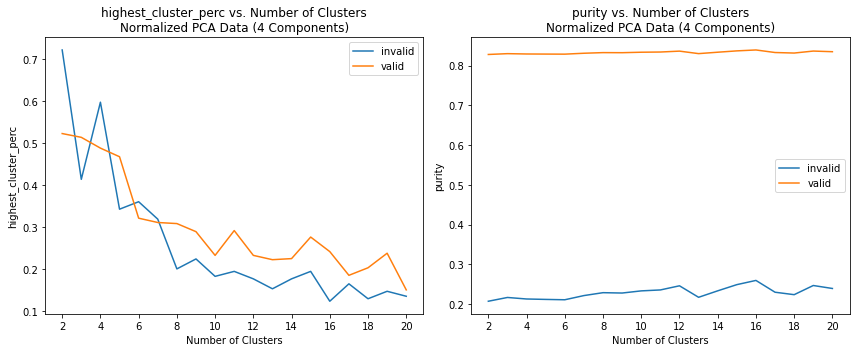

In [141]:
gmm.gmm_pipeline(df_pca,
                 category_column = "label",
                 title_suffix = "Normalized PCA Data (4 Components)",
                 columns_picked = None,
                 possible_K = np.arange(2,21),
                 apply_normalization=True,
                 apply_pca=True,
                 n_components_pca=10
                 
                )